# Feature Selection for predicting diabetes using Particle swarm optimization

**Import the libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Import the **"Pima Indian diabetes dataset"** from Kaggle

The test problem we will use in this repository is the Pima Indians Diabetes problem taken from Machine Learning Repository UCI: https://www.kaggle.com/api/v1/datasets/download/uciml/pima-indians-diabetes-database?dataset_version_number=1.

* This problem is comprised of 768 observations of medical details for Pima indians patents.
* The records describe instantaneous measurements taken from the patient such as their age, the number of times pregnant and blood workup.
* All patients are women aged 21 or older. All attributes are numeric, and their units vary from attribute to attribute.
* Each record has a class value that indicates whether the patient suffered an onset of diabetes within 5 years of when the measurements were taken (1) or not (0).





---



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 13.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: diabetes.csv            


The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes:

* Pregnancies (number of times pregnant),

* Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),

* Blood Pressure (Diastolic Blood Pressure in mmHg),

* Skin Thickness (Triceps skin fold thickness in mm),

* Insulin (2 h serum insulin in mu U/ml),

* BMI (Body Mass Index in kg/m2),

*  Age (years),

* Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')

In [8]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Visualization**

In [ ]:
# Preprocessing and Data Visualization

# Display the first few rows
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Replace 0 values in features where 0 is not a valid value (like 'Glucose', 'BloodPressure', etc.)
# We'll replace these 0 values with NaN to fill them later
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)


In [ ]:
# Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)


In [ ]:
# Check again for missing values
print("\nMissing values after handling:\n", data.isnull().sum())


Missing values after handling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Summary statistics to understand the dataset better
print("\nDataset statistics:\n", data.describe())


Dataset statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.20

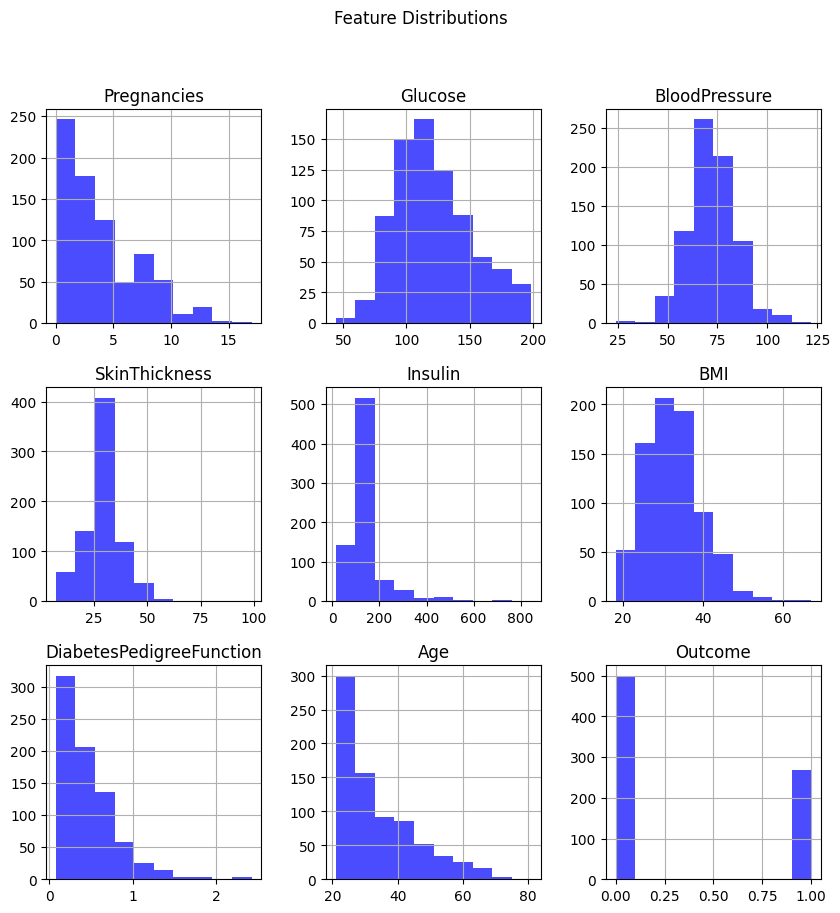

In [ ]:
# 1. Histogram for each feature to understand the distribution
data.hist(bins=10, figsize=(10, 10), color='blue', alpha=0.7)
plt.suptitle('Feature Distributions')
plt.show()


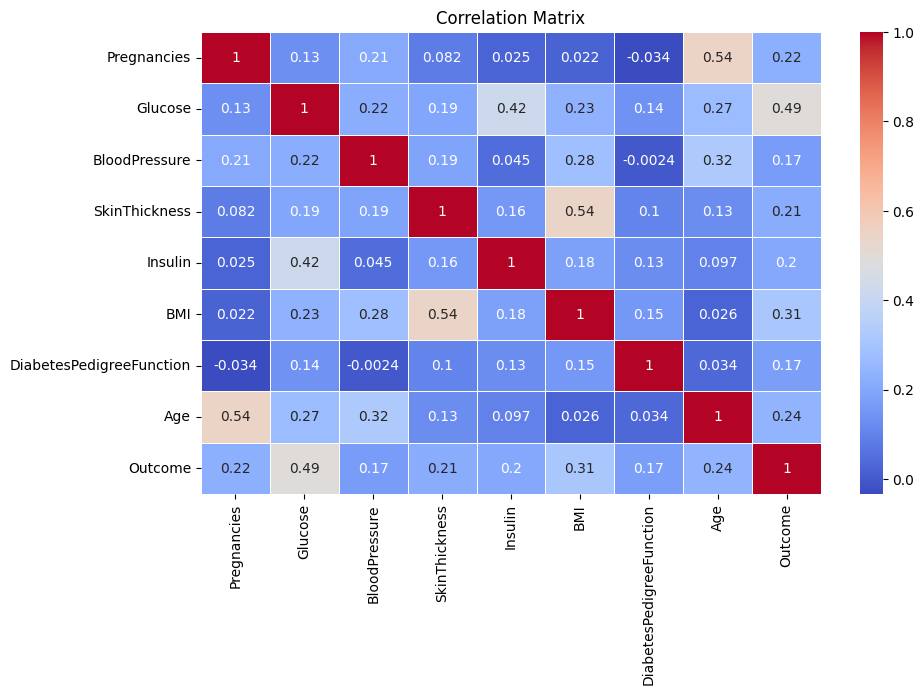

In [ ]:
# 2. Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

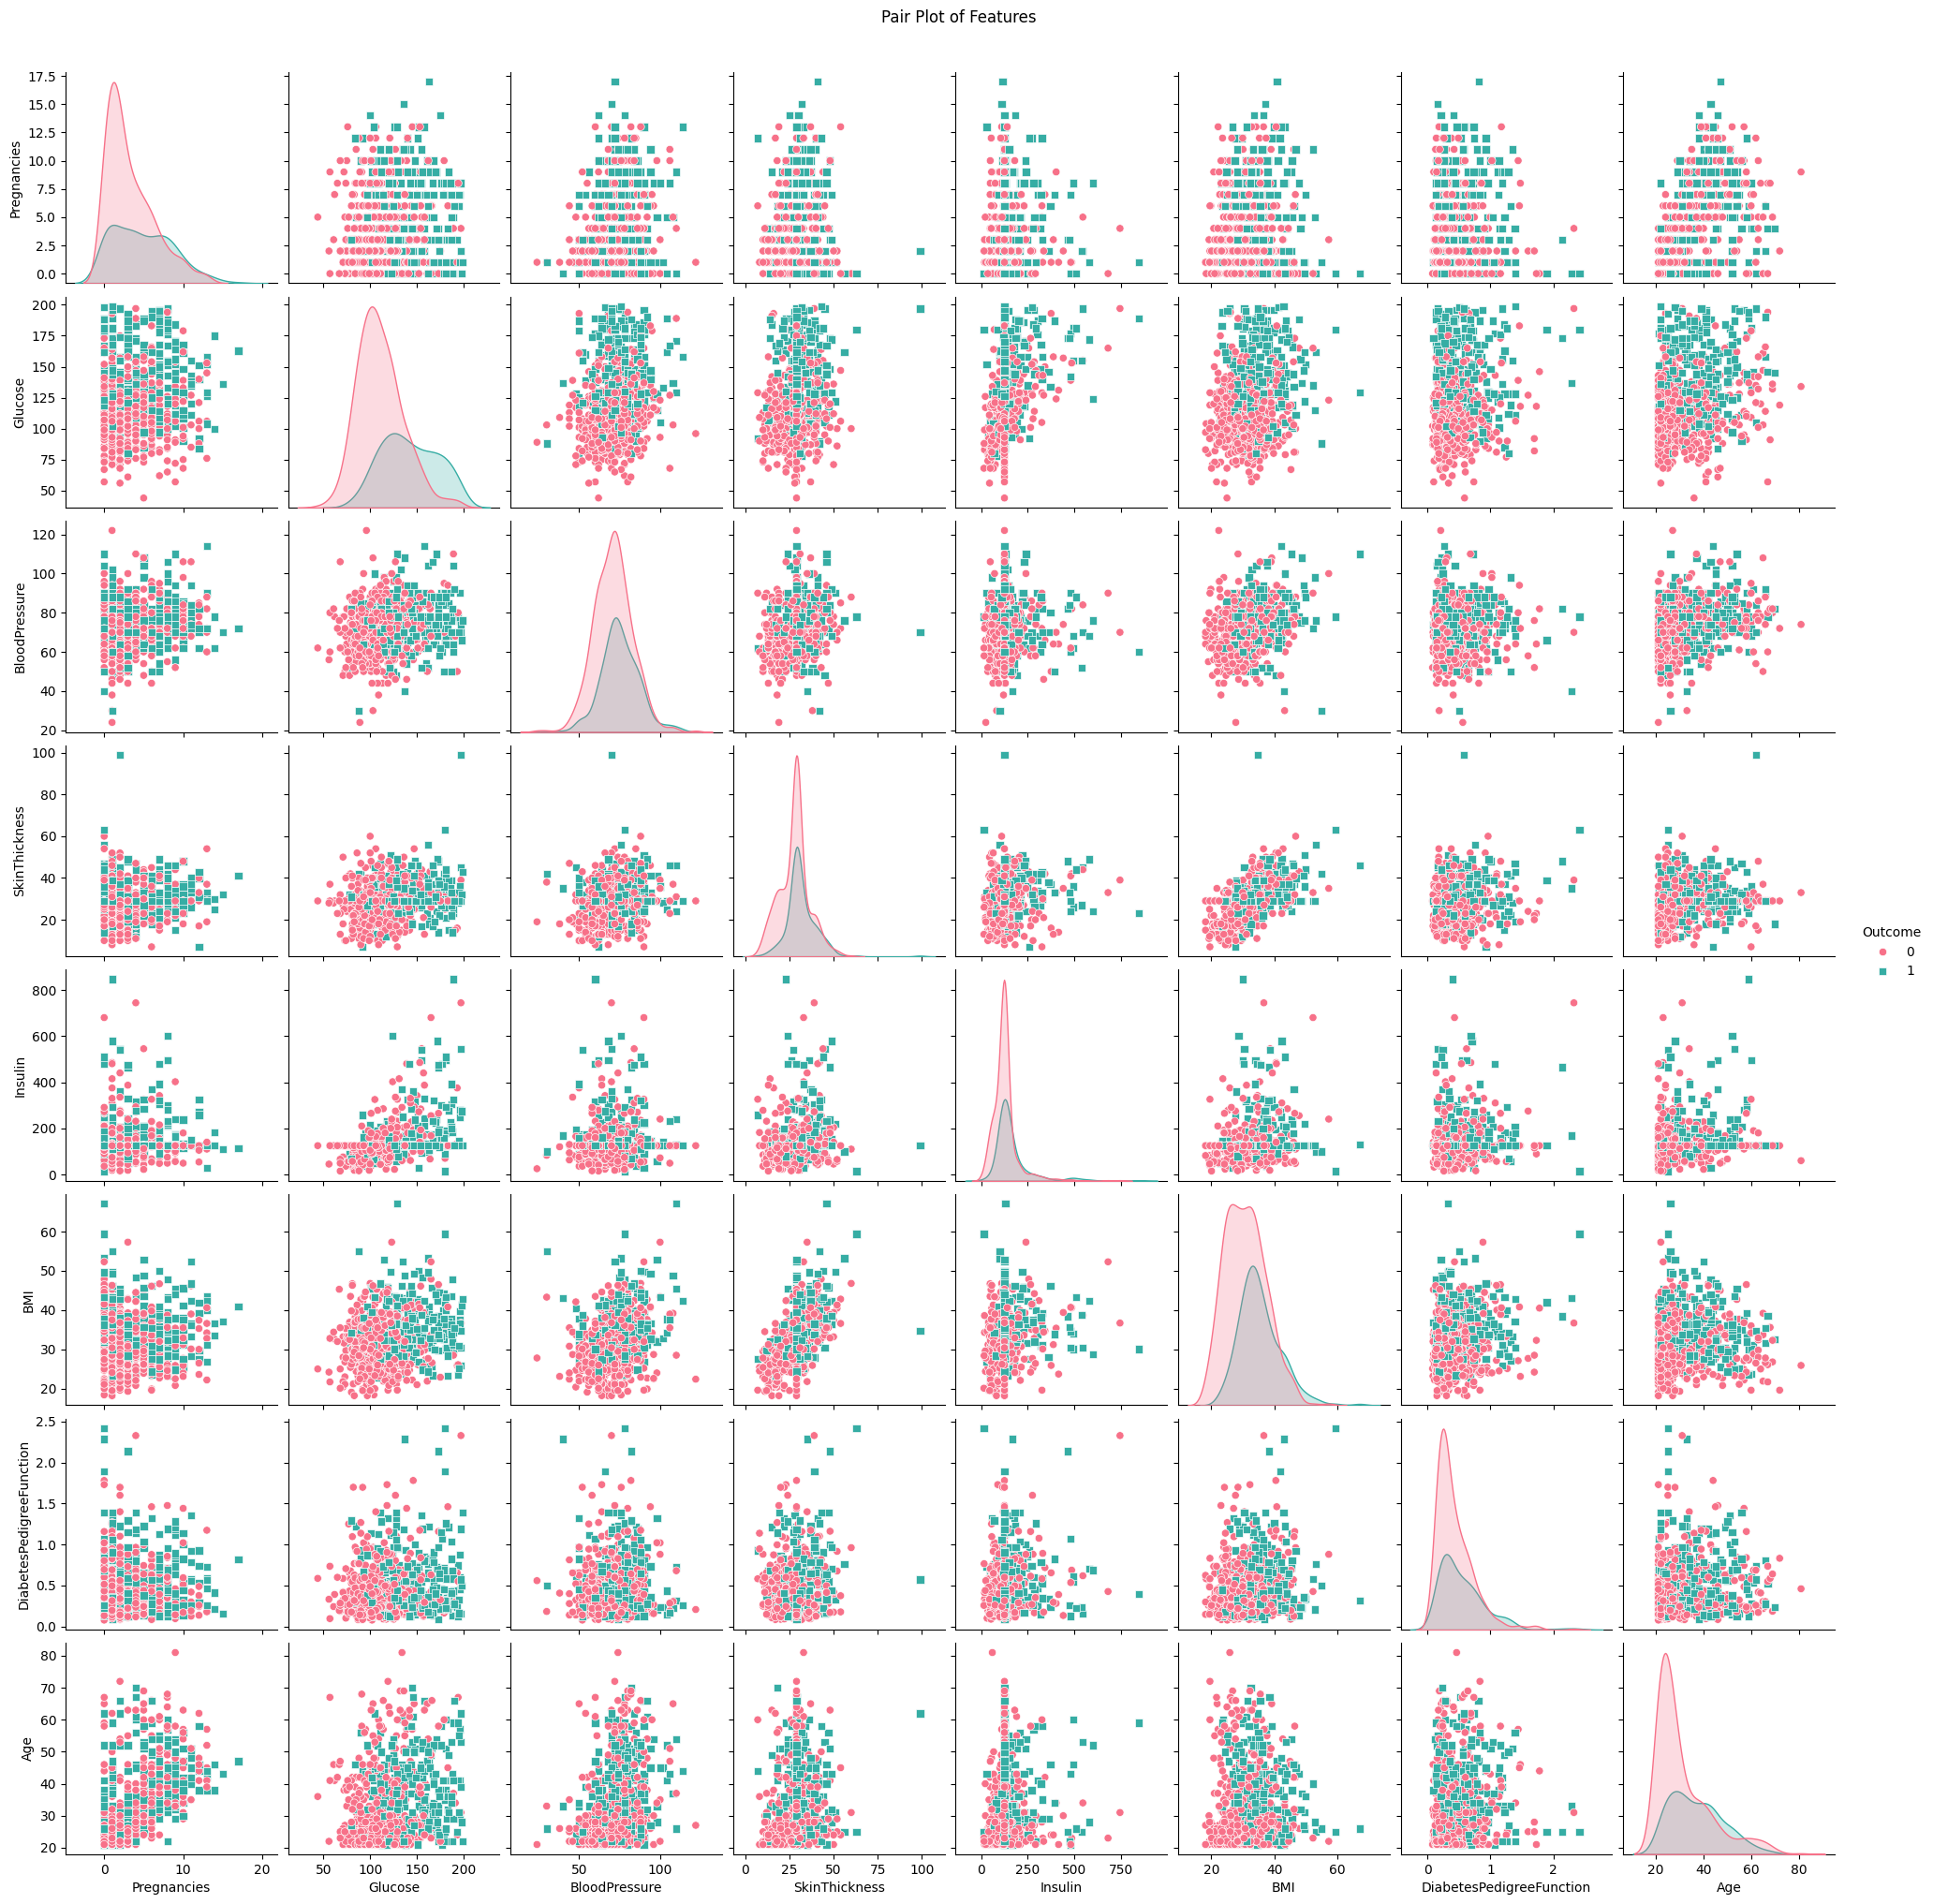

In [ ]:
# 3. Pair plot to visualize relationships and distributions
sns.pairplot(data, hue='Outcome', markers=["o", "s"], palette="husl")
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

**Data Preprocessing**

In [ ]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the datasets
print(f"\nTraining features shape: {X_train_scaled.shape}")
print(f"Test features shape: {X_test_scaled.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training features shape: (537, 8)
Test features shape: (231, 8)
Training labels shape: (537,)
Test labels shape: (231,)


In [ ]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Feature  Selection using Random forest**

<ipython-input-12-eeb5fb1d67cc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


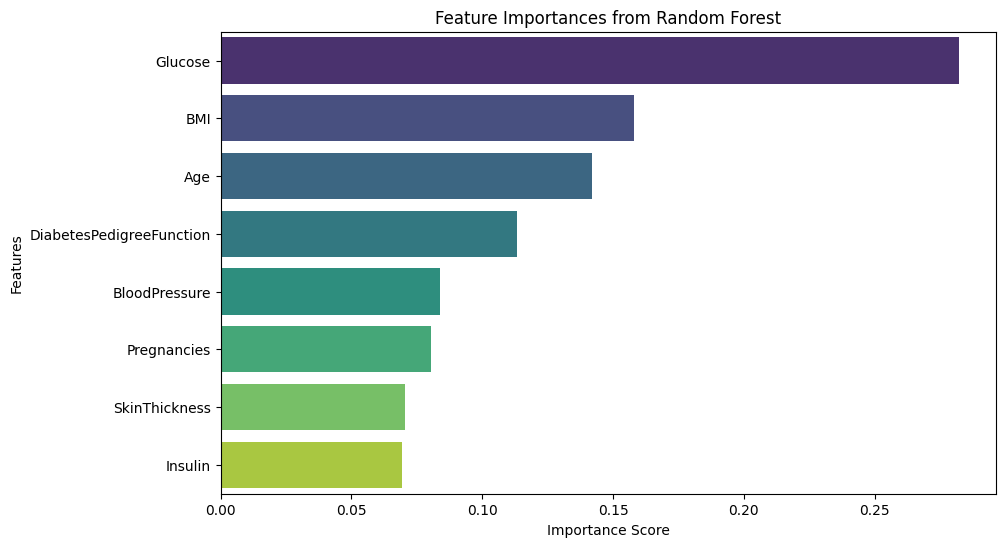

Top 3 features: ['Glucose' 'BMI' 'Age']


In [ ]:
# Feature Selection with Random Forest

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
def train_random_forest(X_train, y_train):
    # Create a RandomForestClassifier model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    return rf_model

# Plot feature importances
def plot_feature_importances(importances, feature_names):
    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the DataFrame by importance values in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
    plt.title('Feature Importances from Random Forest')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

    return feature_importances

# Call the function to train the Random Forest model
rf_model = train_random_forest(X_train_scaled, y_train)

# Get the feature importances from the trained model
importances = rf_model.feature_importances_

# Plot the feature importances
feature_importances_df = plot_feature_importances(importances, X.columns)

# Display top N features (e.g., top 3)
top_n_features = feature_importances_df['Feature'][:3].values
print(f"Top {len(top_n_features)} features: {top_n_features}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Train a Random Forest model to identify important features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Step 2: Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Step 3: Select features above a certain importance threshold

threshold = np.mean(feature_importances)
selected_features = np.where(feature_importances > threshold)[0]

# Step 4: Filter the train and test sets to include only the selected features
X_train_selected_rf = X_train_scaled[:, selected_features]
X_test_selected_rf = X_test_scaled[:, selected_features]

# Step 5: Train a Random Forest model using only the selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected_rf, y_train)

# Step 6: Predict and evaluate accuracy on the test set
y_pred_rf_selected = rf_selected.predict(X_test_selected_rf)
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)

print(f"Test Accuracy with Selected Features (Random Forest): {accuracy_rf_selected:.4f}")


Test Accuracy with Selected Features (Random Forest): 0.6970


**Using PSO for feature selection using random forest**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Particle Swarm Optimization (PSO) for Feature Selection

# Define PSO parameters
class PSO:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0):
        self.n_particles = n_particles  # Number of particles
        self.n_features = n_features  # Number of features (dimensionality)
        self.max_iter = max_iter  # Maximum number of iterations
        self.inertia_weight = inertia_weight  # Inertia weight
        self.cognitive_weight = cognitive_weight  # Cognitive weight (personal best)
        self.social_weight = social_weight  # Social weight (global best)

        # Initialize particles (random binary vectors for feature selection)
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)  # Initial velocities
        self.pbest_positions = self.particles.copy()  # Personal best positions
        self.pbest_scores = np.zeros(n_particles)  # Personal best scores
        self.gbest_position = None  # Global best position
        self.gbest_score = -np.inf  # Global best score

    # Evaluate particle's fitness using Random Forest and cross-validation
    def evaluate_fitness(self, X_train, y_train, particle):
        # Select features based on the particle's binary position
        selected_features = X_train[:, particle == 1]

        # If no features are selected, return a poor fitness score
        if selected_features.shape[1] == 0:
            return 0

        # Use RandomForest to evaluate fitness with cross-validation
        rf = RandomForestClassifier(n_estimators=50, random_state=42)
        fitness = cross_val_score(rf, selected_features, y_train, cv=5, scoring='accuracy').mean()

        return fitness

    # Update particle velocity and position
    def update_velocity_position(self, particle_idx, X_train, y_train):
        r1, r2 = np.random.rand(), np.random.rand()  # Random factors

        # Update velocity
        self.velocities[particle_idx] = (self.inertia_weight * self.velocities[particle_idx] +
                                         self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx]) +
                                         self.social_weight * r2 * (self.gbest_position - self.particles[particle_idx]))

        # Sigmoid function to convert velocity to probabilities for binary positions
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        new_position = np.random.rand(self.n_features) < sigmoid  # Update position based on probability

        self.particles[particle_idx] = new_position.astype(int)

    # Run PSO algorithm
    def optimize(self, X_train, y_train):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration+1}/{self.max_iter}")

            for i in range(self.n_particles):
                # Evaluate fitness of current particle
                fitness = self.evaluate_fitness(X_train, y_train, self.particles[i])

                # Update personal best if current fitness is better
                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

                # Update global best if necessary
                if fitness > self.gbest_score:
                    self.gbest_score = fitness
                    self.gbest_position = self.particles[i].copy()

                # Update particle velocity and position
                self.update_velocity_position(i, X_train, y_train)

            # Print global best score at each iteration
            print(f"Best Fitness in Iteration {iteration+1}: {self.gbest_score}")

        # Return the global best position (optimal feature subset)
        return self.gbest_position


# ================================
# PSO with Random Forest for Feature Selection
# ================================

# Function to perform PSO-based feature selection
def pso_feature_selection(X_train, y_train, n_particles=30, max_iter=20):
    n_features = X_train.shape[1]

    # Initialize PSO optimizer
    pso_optimizer = PSO(n_particles=n_particles, n_features=n_features, max_iter=max_iter)

    # Optimize to find the best feature subset
    best_feature_subset = pso_optimizer.optimize(X_train, y_train)

    # Print the selected features
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")

    return selected_features


# ================================
# Apply PSO for Feature Selection
# ================================

# Call the function to perform PSO-based feature selection
selected_features = pso_feature_selection(X_train_scaled, y_train)

# Select the top features from the dataset
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

# ================================
# Train Random Forest with Selected Features
# ================================

# Train a Random Forest classifier using the selected features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Selected Features: {accuracy:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7783489096573208
Iteration 2/20
Best Fitness in Iteration 2: 0.7783489096573208
Iteration 3/20
Best Fitness in Iteration 3: 0.7838698511595708
Iteration 4/20
Best Fitness in Iteration 4: 0.7838698511595708
Iteration 5/20
Best Fitness in Iteration 5: 0.7839390792661821
Iteration 6/20
Best Fitness in Iteration 6: 0.7839390792661821
Iteration 7/20
Best Fitness in Iteration 7: 0.7839390792661821
Iteration 8/20
Best Fitness in Iteration 8: 0.7839390792661821
Iteration 9/20
Best Fitness in Iteration 9: 0.7839390792661821
Iteration 10/20
Best Fitness in Iteration 10: 0.7839390792661821
Iteration 11/20
Best Fitness in Iteration 11: 0.7839390792661821
Iteration 12/20
Best Fitness in Iteration 12: 0.7839390792661821
Iteration 13/20
Best Fitness in Iteration 13: 0.7839390792661821
Iteration 14/20
Best Fitness in Iteration 14: 0.7839390792661821
Iteration 15/20
Best Fitness in Iteration 15: 0.7839390792661821
Iteration 16/20
Best Fitness in Iteration 1

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Train an XGBoost model to determine feature importances
xgb = XGBClassifier( eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

# Step 2: Get feature importances from the trained XGBoost model
feature_importances = xgb.feature_importances_

# Step 3: Select features based on an importance threshold
# Here, we're selecting features with importance above the mean importance
threshold = np.mean(feature_importances)
selected_features = np.where(feature_importances > threshold)[0]

# Step 4: Filter the train and test sets to include only the selected features
X_train_selected_xgb = X_train_scaled[:, selected_features]
X_test_selected_xgb = X_test_scaled[:, selected_features]

# Step 5: Train an XGBoost model using only the selected features
xgb_selected = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_selected.fit(X_train_selected_xgb, y_train)

# Step 6: Predict and evaluate accuracy on the test set
y_pred_xgb_selected = xgb_selected.predict(X_test_selected_xgb)
accuracy_xgb_selected = accuracy_score(y_test, y_pred_xgb_selected)

print(f"Test Accuracy with Selected Features (XGBoost): {accuracy_xgb_selected:.4f}")


Test Accuracy with Selected Features (XGBoost): 0.7143


**PSO for Feature selection using XGBoost**

In [ ]:
# ================================
# XGBoost for Feature Selection with PSO
# ================================

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define PSO parameters and implementation (same as before)
# Here i have modify only the fitness evaluation part to use XGBoost

class PSO_XGBoost:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0):
        self.n_particles = n_particles  # Number of particles
        self.n_features = n_features  # Number of features (dimensionality)
        self.max_iter = max_iter  # Maximum number of iterations
        self.inertia_weight = inertia_weight  # Inertia weight
        self.cognitive_weight = cognitive_weight  # Cognitive weight (personal best)
        self.social_weight = social_weight  # Social weight (global best)

        # Initialize particles (random binary vectors for feature selection)
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)  # Initial velocities
        self.pbest_positions = self.particles.copy()  # Personal best positions
        self.pbest_scores = np.zeros(n_particles)  # Personal best scores
        self.gbest_position = None  # Global best position
        self.gbest_score = -np.inf  # Global best score

    # Evaluate particle's fitness using XGBoost and cross-validation
    def evaluate_fitness(self, X_train, y_train, particle):
        # Select features based on the particle's binary position
        selected_features = X_train[:, particle == 1]

        # If no features are selected, return a poor fitness score
        if selected_features.shape[1] == 0:
            return 0

        # Use XGBoost to evaluate fitness with cross-validation
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
        fitness = cross_val_score(xgb_model, selected_features, y_train, cv=5, scoring='accuracy').mean()

        return fitness

    # Update particle velocity and position (same as before)
    def update_velocity_position(self, particle_idx, X_train, y_train):
        r1, r2 = np.random.rand(), np.random.rand()  # Random factors

        # Update velocity
        self.velocities[particle_idx] = (self.inertia_weight * self.velocities[particle_idx] +
                                         self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx]) +
                                         self.social_weight * r2 * (self.gbest_position - self.particles[particle_idx]))

        # Sigmoid function to convert velocity to probabilities for binary positions
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        new_position = np.random.rand(self.n_features) < sigmoid  # Update position based on probability

        self.particles[particle_idx] = new_position.astype(int)

    # Run PSO algorithm
    def optimize(self, X_train, y_train):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration+1}/{self.max_iter}")

            for i in range(self.n_particles):
                # Evaluate fitness of current particle
                fitness = self.evaluate_fitness(X_train, y_train, self.particles[i])

                # Update personal best if current fitness is better
                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

                # Update global best if necessary
                if fitness > self.gbest_score:
                    self.gbest_score = fitness
                    self.gbest_position = self.particles[i].copy()

                # Update particle velocity and position
                self.update_velocity_position(i, X_train, y_train)

            # Print global best score at each iteration
            print(f"Best Fitness in Iteration {iteration+1}: {self.gbest_score}")

        # Return the global best position (optimal feature subset)
        return self.gbest_position


# ================================
# PSO with XGBoost for Feature Selection
# ================================

# Function to perform PSO-based feature selection using XGBoost
def pso_feature_selection_xgboost(X_train, y_train, n_particles=30, max_iter=20):
    n_features = X_train.shape[1]

    # Initialize PSO optimizer
    pso_optimizer = PSO_XGBoost(n_particles=n_particles, n_features=n_features, max_iter=max_iter)

    # Optimize to find the best feature subset
    best_feature_subset = pso_optimizer.optimize(X_train, y_train)

    # Print the selected features
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")

    return selected_features


# ================================
# Apply PSO for Feature Selection with XGBoost
# ================================

# Call the function to perform PSO-based feature selection with XGBoost
selected_features_xgboost = pso_feature_selection_xgboost(X_train_scaled, y_train)

# Select the top features from the dataset
X_train_selected_xgboost = X_train_scaled[:, selected_features_xgboost]
X_test_selected_xgboost = X_test_scaled[:, selected_features_xgboost]

# ================================
# Train XGBoost with Selected Features
# ================================

# Train an XGBoost classifier using the selected features
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_selected_xgboost, y_train)

# Evaluate the model on the test set
y_pred_xgboost = xgb_model.predict(X_test_selected_xgboost)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"Test Accuracy with Selected Features (XGBoost): {accuracy_xgboost:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7540844582900658
Iteration 2/20
Best Fitness in Iteration 2: 0.7540844582900658
Iteration 3/20
Best Fitness in Iteration 3: 0.7540844582900658
Iteration 4/20
Best Fitness in Iteration 4: 0.7540844582900658
Iteration 5/20
Best Fitness in Iteration 5: 0.7690031152647976
Iteration 6/20
Best Fitness in Iteration 6: 0.7690031152647976
Iteration 7/20
Best Fitness in Iteration 7: 0.7690031152647976
Iteration 8/20
Best Fitness in Iteration 8: 0.7690031152647976
Iteration 9/20
Best Fitness in Iteration 9: 0.7690031152647976
Iteration 10/20
Best Fitness in Iteration 10: 0.7690031152647976
Iteration 11/20
Best Fitness in Iteration 11: 0.7690031152647976
Iteration 12/20
Best Fitness in Iteration 12: 0.7690031152647976
Iteration 13/20
Best Fitness in Iteration 13: 0.7690031152647976
Iteration 14/20
Best Fitness in Iteration 14: 0.7690031152647976
Iteration 15/20
Best Fitness in Iteration 15: 0.7690031152647976
Iteration 16/20
Best Fitness in Iteration 1

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [ ]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)


In [ ]:
# ================================
# XGBoost for Feature Selection with PSO
# ================================

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define PSO parameters and implementation (same as before)
# We modify only the fitness evaluation part to use XGBoost

class PSO_XGBoost:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0):
        self.n_particles = n_particles  # Number of particles
        self.n_features = n_features  # Number of features (dimensionality)
        self.max_iter = max_iter  # Maximum number of iterations
        self.inertia_weight = inertia_weight  # Inertia weight
        self.cognitive_weight = cognitive_weight  # Cognitive weight (personal best)
        self.social_weight = social_weight  # Social weight (global best)

        # Initialize particles (random binary vectors for feature selection)
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)  # Initial velocities
        self.pbest_positions = self.particles.copy()  # Personal best positions
        self.pbest_scores = np.zeros(n_particles)  # Personal best scores
        self.gbest_position = None  # Global best position
        self.gbest_score = -np.inf  # Global best score

    # Evaluate particle's fitness using XGBoost and cross-validation
    def evaluate_fitness(self, X_train, y_train, particle):
        # Select features based on the particle's binary position
        selected_features = X_train[:, particle == 1]

        # If no features are selected, return a poor fitness score
        if selected_features.shape[1] == 0:
            return 0

        # Use XGBoost to evaluate fitness with cross-validation
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
        fitness = cross_val_score(xgb_model, selected_features, y_train, cv=5, scoring='accuracy').mean()

        return fitness

    # Update particle velocity and position (same as before)
    def update_velocity_position(self, particle_idx, X_train, y_train):
        r1, r2 = np.random.rand(), np.random.rand()  # Random factors

        # Update velocity
        self.velocities[particle_idx] = (self.inertia_weight * self.velocities[particle_idx] +
                                         self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx]) +
                                         self.social_weight * r2 * (self.gbest_position - self.particles[particle_idx]))

        # Sigmoid function to convert velocity to probabilities for binary positions
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        new_position = np.random.rand(self.n_features) < sigmoid  # Update position based on probability

        self.particles[particle_idx] = new_position.astype(int)

    # Run PSO algorithm
    def optimize(self, X_train, y_train):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration+1}/{self.max_iter}")

            for i in range(self.n_particles):
                # Evaluate fitness of current particle
                fitness = self.evaluate_fitness(X_train, y_train, self.particles[i])

                # Update personal best if current fitness is better
                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

                # Update global best if necessary
                if fitness > self.gbest_score:
                    self.gbest_score = fitness
                    self.gbest_position = self.particles[i].copy()

                # Update particle velocity and position
                self.update_velocity_position(i, X_train, y_train)

            # Print global best score at each iteration
            print(f"Best Fitness in Iteration {iteration+1}: {self.gbest_score}")

        # Return the global best position (optimal feature subset)
        return self.gbest_position


# ================================
# PSO with XGBoost for Feature Selection
# ================================

# Function to perform PSO-based feature selection using XGBoost
def pso_feature_selection_xgboost(X_train, y_train, n_particles=30, max_iter=20):
    n_features = X_train.shape[1]

    # Initialize PSO optimizer
    pso_optimizer = PSO_XGBoost(n_particles=n_particles, n_features=n_features, max_iter=max_iter)

    # Optimize to find the best feature subset
    best_feature_subset = pso_optimizer.optimize(X_train, y_train)

    # Print the selected features
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")

    return selected_features


# ================================
# Apply PSO for Feature Selection with XGBoost
# ================================

# Call the function to perform PSO-based feature selection with XGBoost
selected_features_xgboost = pso_feature_selection_xgboost(X_train_scaled, y_train)

# Select the top features from the dataset
X_train_selected_xgboost = X_train_scaled[:, selected_features_xgboost]
X_test_selected_xgboost = X_test_scaled[:, selected_features_xgboost]

# ================================
# Train XGBoost with Selected Features
# ================================

# Train an XGBoost classifier using the selected features
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_selected_xgboost, y_train)

# Evaluate the model on the test set
y_pred_xgboost = xgb_model.predict(X_test_selected_xgboost)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"Test Accuracy with Selected Features (XGBoost): {accuracy_xgboost:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7485635167878159
Iteration 2/20
Best Fitness in Iteration 2: 0.759674627898927
Iteration 3/20
Best Fitness in Iteration 3: 0.7690031152647976
Iteration 4/20
Best Fitness in Iteration 4: 0.7690031152647976
Iteration 5/20
Best Fitness in Iteration 5: 0.7690031152647976
Iteration 6/20
Best Fitness in Iteration 6: 0.7690031152647976
Iteration 7/20
Best Fitness in Iteration 7: 0.7690031152647976
Iteration 8/20
Best Fitness in Iteration 8: 0.7690031152647976
Iteration 9/20
Best Fitness in Iteration 9: 0.7690031152647976
Iteration 10/20
Best Fitness in Iteration 10: 0.7690031152647976
Iteration 11/20
Best Fitness in Iteration 11: 0.7690031152647976
Iteration 12/20
Best Fitness in Iteration 12: 0.7690031152647976
Iteration 13/20
Best Fitness in Iteration 13: 0.7690031152647976
Iteration 14/20
Best Fitness in Iteration 14: 0.7690031152647976
Iteration 15/20
Best Fitness in Iteration 15: 0.7690031152647976
Iteration 16/20
Best Fitness in Iteration 16

**Model Comparison**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ================================
# Train and Evaluate Models
# ================================

def evaluate_models(X_train, X_test, y_train, y_test, selected_features):
    # Initialize models
    rf_model = RandomForestClassifier(random_state=42)
    xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

    # Train Random Forest on full features
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)

    # Train XGBoost on full features
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)

    # Train Random Forest on selected features
    rf_model_pso = RandomForestClassifier(random_state=42)
    rf_model_pso.fit(X_train[:, selected_features], y_train)
    rf_pred_pso = rf_model_pso.predict(X_test[:, selected_features])
    rf_accuracy_pso = accuracy_score(y_test, rf_pred_pso)

    # Train XGBoost on selected features
    xgb_model_pso = XGBClassifier(eval_metric='logloss', random_state=42)
    xgb_model_pso.fit(X_train[:, selected_features], y_train)
    xgb_pred_pso = xgb_model_pso.predict(X_test[:, selected_features])
    xgb_accuracy_pso = accuracy_score(y_test, xgb_pred_pso)

    return {
        "Random Forest": rf_accuracy,
        "XGBoost": xgb_accuracy,
        "Random Forest (PSO)": rf_accuracy_pso,
        "XGBoost (PSO)": xgb_accuracy_pso
    }

# ================================
# Evaluate and Compare Models
# ================================

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
selected_features_rf_pso = pso_feature_selection_xgboost(X_train_scaled, y_train)  # Select features using PSO for XGBoost
selected_features_xgb_pso = pso_feature_selection_xgboost(X_train_scaled, y_train)  # Select features using PSO for Random Forest

# Evaluate all models
results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, selected_features_xgb_pso)

# Display results
print("\nModel Performance Comparison:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7634302526825891
Iteration 2/20
Best Fitness in Iteration 2: 0.7634821737625476
Iteration 3/20
Best Fitness in Iteration 3: 0.7690031152647976
Iteration 4/20
Best Fitness in Iteration 4: 0.7690031152647976
Iteration 5/20
Best Fitness in Iteration 5: 0.7690031152647976
Iteration 6/20
Best Fitness in Iteration 6: 0.7690031152647976
Iteration 7/20
Best Fitness in Iteration 7: 0.7690031152647976
Iteration 8/20
Best Fitness in Iteration 8: 0.7690031152647976
Iteration 9/20
Best Fitness in Iteration 9: 0.7690031152647976
Iteration 10/20
Best Fitness in Iteration 10: 0.7690031152647976
Iteration 11/20
Best Fitness in Iteration 11: 0.7690031152647976
Iteration 12/20
Best Fitness in Iteration 12: 0.7690031152647976
Iteration 13/20
Best Fitness in Iteration 13: 0.7690031152647976
Iteration 14/20
Best Fitness in Iteration 14: 0.7690031152647976
Iteration 15/20
Best Fitness in Iteration 15: 0.7690031152647976
Iteration 16/20
Best Fitness in Iteration 1

**Improved PSO (IPSO) for feature selection using xgboost**

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# IPSO Class
class IPSO:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0, crossover_rate=0.7, mutation_rate=0.1):
        self.n_particles = n_particles
        self.n_features = n_features
        self.max_iter = max_iter
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

        # Initialize particles
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)
        self.pbest_positions = self.particles.copy()
        self.pbest_scores = np.zeros(n_particles)
        self.gbest_position = None
        self.gbest_score = -np.inf

    def evaluate_fitness(self, X_train, y_train, particle):
        selected_features = X_train[:, particle == 1]
        if selected_features.shape[1] == 0:
            return 0
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
        fitness = cross_val_score(xgb_model, selected_features, y_train, cv=5, scoring='accuracy').mean()
        return fitness

    def update_velocity_position(self, particle_idx):
        r1, r2 = np.random.rand(), np.random.rand()
        self.velocities[particle_idx] = (self.inertia_weight * self.velocities[particle_idx] +
                                         self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx]) +
                                         self.social_weight * r2 * (self.gbest_position - self.particles[particle_idx]))
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        new_position = np.random.rand(self.n_features) < sigmoid
        self.particles[particle_idx] = new_position.astype(int)

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            crossover_point = np.random.randint(0, self.n_features)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            return child1, child2
        return parent1.copy(), parent2.copy()

    def mutate(self, particle):
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_rate:
                particle[i] = 1 - particle[i]  # Flip bit
        return particle

    def optimize(self, X_train, y_train):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration + 1}/{self.max_iter}")
            for i in range(self.n_particles):
                fitness = self.evaluate_fitness(X_train, y_train, self.particles[i])

                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

                if fitness > self.gbest_score:
                    self.gbest_score = fitness
                    self.gbest_position = self.particles[i].copy()

                # Update velocity and position
                self.update_velocity_position(i)

            # Apply crossover and mutation
            for i in range(0, self.n_particles, 2):
                parent1 = self.particles[i]
                parent2 = self.particles[i + 1] if i + 1 < self.n_particles else self.particles[i]
                child1, child2 = self.crossover(parent1, parent2)
                self.particles[i] = self.mutate(child1)
                self.particles[i + 1] = self.mutate(child2)

            print(f"Best Fitness in Iteration {iteration + 1}: {self.gbest_score}")

        return self.gbest_position


# ================================
# IPSO Feature Selection
# ================================

def ipso_feature_selection(X_train, y_train, n_particles=30, max_iter=20):
    n_features = X_train.shape[1]
    ipso_optimizer = IPSO(n_particles=n_particles, n_features=n_features, max_iter=max_iter)
    best_feature_subset = ipso_optimizer.optimize(X_train, y_train)
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")
    return selected_features


# ================================
# Apply IPSO for Feature Selection
# ================================

# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are already defined
selected_features_ipso = ipso_feature_selection(X_train_scaled, y_train)

# Select the top features from the dataset
X_train_selected_ipso = X_train_scaled[:, selected_features_ipso]
X_test_selected_ipso = X_test_scaled[:, selected_features_ipso]

# ================================
# Train and Evaluate XGBoost with IPSO Selected Features
# ================================

xgb_model_ipso = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_ipso.fit(X_train_selected_ipso, y_train)
y_pred_ipso = xgb_model_ipso.predict(X_test_selected_ipso)
accuracy_ipso = accuracy_score(y_test, y_pred_ipso)
print(f"Test Accuracy with Selected Features (IPSO): {accuracy_ipso:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7634302526825891
Iteration 2/20
Best Fitness in Iteration 2: 0.7634821737625476
Iteration 3/20
Best Fitness in Iteration 3: 0.7634821737625476
Iteration 4/20
Best Fitness in Iteration 4: 0.7634821737625476
Iteration 5/20
Best Fitness in Iteration 5: 0.7634821737625476
Iteration 6/20
Best Fitness in Iteration 6: 0.7634821737625476
Iteration 7/20
Best Fitness in Iteration 7: 0.7634821737625476
Iteration 8/20
Best Fitness in Iteration 8: 0.7634821737625476
Iteration 9/20
Best Fitness in Iteration 9: 0.7634821737625476
Iteration 10/20
Best Fitness in Iteration 10: 0.7634821737625476
Iteration 11/20
Best Fitness in Iteration 11: 0.7634821737625476
Iteration 12/20
Best Fitness in Iteration 12: 0.7690031152647976
Iteration 13/20
Best Fitness in Iteration 13: 0.7690031152647976
Iteration 14/20
Best Fitness in Iteration 14: 0.7690031152647976
Iteration 15/20
Best Fitness in Iteration 15: 0.7690031152647976
Iteration 16/20
Best Fitness in Iteration 1

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Enhanced PSO Class with GA Crossover and Mutation for Feature Selection
class IPSO_XGBoost:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0, crossover_prob=0.7, mutation_prob=0.1):
        self.n_particles = n_particles
        self.n_features = n_features
        self.max_iter = max_iter
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob

        # Initialize particles (binary vectors for feature selection) and velocities
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)
        self.pbest_positions = self.particles.copy()
        self.pbest_scores = np.zeros(n_particles)
        self.gbest_position = None
        self.gbest_score = -np.inf

    def evaluate_fitness(self, X_train, y_train, particle):
        selected_features = X_train[:, particle == 1]

        # If no features are selected, return a poor fitness score
        if selected_features.shape[1] == 0:
            return 0

        # Evaluate fitness using XGBoost accuracy with cross-validation
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
        fitness = cross_val_score(xgb_model, selected_features, y_train, cv=5, scoring='accuracy').mean()

        return fitness

    def crossover(self, parent1, parent2):
        """Single-point crossover between two parents to create offspring."""
        if np.random.rand() < self.crossover_prob:
            point = np.random.randint(1, self.n_features - 1)
            offspring = np.concatenate([parent1[:point], parent2[point:]])
            return offspring
        else:
            return parent1

    def mutation(self, particle):
        """Random mutation for a particle."""
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_prob:
                particle[i] = 1 - particle[i]
        return particle

    def update_velocity_position(self, particle_idx):
        r1, r2 = np.random.rand(), np.random.rand()

        # Update velocity
        self.velocities[particle_idx] = (self.inertia_weight * self.velocities[particle_idx] +
                                         self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx]) +
                                         self.social_weight * r2 * (self.gbest_position - self.particles[particle_idx]))

        # Sigmoid to convert velocities into binary positions
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        new_position = np.random.rand(self.n_features) < sigmoid
        self.particles[particle_idx] = new_position.astype(int)

    def optimize(self, X_train, y_train):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration+1}/{self.max_iter}")

            # Evaluate fitness of each particle
            for i in range(self.n_particles):
                fitness = self.evaluate_fitness(X_train, y_train, self.particles[i])

                # Update personal and global bests
                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

                if fitness > self.gbest_score:
                    self.gbest_score = fitness
                    self.gbest_position = self.particles[i].copy()

                # Update particle velocity and position
                self.update_velocity_position(i)

            # Apply GA crossover and mutation on particles after updating
            for i in range(0, self.n_particles, 2):
                if i + 1 < self.n_particles:
                    # Crossover between pairs of particles
                    offspring1 = self.crossover(self.particles[i], self.particles[i+1])
                    offspring2 = self.crossover(self.particles[i+1], self.particles[i])
                    self.particles[i] = self.mutation(offspring1)
                    self.particles[i+1] = self.mutation(offspring2)

            print(f"Best Fitness in Iteration {iteration+1}: {self.gbest_score}")

        return self.gbest_position

# ================================
# Run Enhanced PSO for Feature Selection
# ================================

def ipso_feature_selection_xgboost(X_train, y_train, n_particles=30, max_iter=20):
    n_features = X_train.shape[1]

    # Initialize IPSO optimizer
    ipso_optimizer = IPSO_XGBoost(n_particles=n_particles, n_features=n_features, max_iter=max_iter)

    # Optimize to find the best feature subset
    best_feature_subset = ipso_optimizer.optimize(X_train, y_train)

    # Print the selected features
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")

    return selected_features

# ================================
# Apply IPSO with XGBoost
# ================================

# Call the function for IPSO-based feature selection with XGBoost
selected_features_ipso_xgboost = ipso_feature_selection_xgboost(X_train_scaled, y_train)

# Extract the selected features for training and testing
X_train_selected_ipso_xgboost = X_train_scaled[:, selected_features_ipso_xgboost]
X_test_selected_ipso_xgboost = X_test_scaled[:, selected_features_ipso_xgboost]

# Train and evaluate XGBoost with the selected features
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_selected_ipso_xgboost, y_train)
y_pred_ipso_xgboost = xgb_model.predict(X_test_selected_ipso_xgboost)
accuracy_ipso_xgboost = accuracy_score(y_test, y_pred_ipso_xgboost)
print(f"Test Accuracy with Selected Features (IPSO-XGBoost): {accuracy_ipso_xgboost:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7466251298026998
Iteration 2/20
Best Fitness in Iteration 2: 0.7634821737625476
Iteration 3/20
Best Fitness in Iteration 3: 0.7634821737625476
Iteration 4/20
Best Fitness in Iteration 4: 0.7634821737625476
Iteration 5/20
Best Fitness in Iteration 5: 0.7634821737625476
Iteration 6/20
Best Fitness in Iteration 6: 0.7634821737625476
Iteration 7/20
Best Fitness in Iteration 7: 0.7634821737625476
Iteration 8/20
Best Fitness in Iteration 8: 0.7690031152647976
Iteration 9/20
Best Fitness in Iteration 9: 0.7690031152647976
Iteration 10/20
Best Fitness in Iteration 10: 0.7690031152647976
Iteration 11/20
Best Fitness in Iteration 11: 0.7690031152647976
Iteration 12/20
Best Fitness in Iteration 12: 0.7690031152647976
Iteration 13/20
Best Fitness in Iteration 13: 0.7690031152647976
Iteration 14/20
Best Fitness in Iteration 14: 0.7690031152647976
Iteration 15/20
Best Fitness in Iteration 15: 0.7690031152647976
Iteration 16/20
Best Fitness in Iteration 1

**IPSO with Random forest for Feature Selection**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Enhanced PSO Class with GA Crossover and Mutation for Feature Selection using Random Forest
class IPSO_RandomForest:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0, crossover_prob=0.7, mutation_prob=0.1):
        self.n_particles = n_particles
        self.n_features = n_features
        self.max_iter = max_iter
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob

        # Initialize particles (binary vectors for feature selection) and velocities
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)
        self.pbest_positions = self.particles.copy()
        self.pbest_scores = np.zeros(n_particles)
        self.gbest_position = None
        self.gbest_score = -np.inf

    def evaluate_fitness(self, X_train, y_train, particle):
        selected_features = X_train[:, particle == 1]

        # If no features are selected, return a poor fitness score
        if selected_features.shape[1] == 0:
            return 0

        # Evaluate fitness using Random Forest accuracy with cross-validation
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        fitness = cross_val_score(rf_model, selected_features, y_train, cv=5, scoring='accuracy').mean()

        return fitness

    def crossover(self, parent1, parent2):
        """Single-point crossover between two parents to create offspring."""
        if np.random.rand() < self.crossover_prob:
            point = np.random.randint(1, self.n_features - 1)
            offspring = np.concatenate([parent1[:point], parent2[point:]])
            return offspring
        else:
            return parent1

    def mutation(self, particle):
        """Random mutation for a particle."""
        for i in range(self.n_features):
            if np.random.rand() < self.mutation_prob:
                particle[i] = 1 - particle[i]
        return particle

    def update_velocity_position(self, particle_idx):
        r1, r2 = np.random.rand(), np.random.rand()

        # Update velocity
        self.velocities[particle_idx] = (self.inertia_weight * self.velocities[particle_idx] +
                                         self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx]) +
                                         self.social_weight * r2 * (self.gbest_position - self.particles[particle_idx]))

        # Sigmoid to convert velocities into binary positions
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        new_position = np.random.rand(self.n_features) < sigmoid
        self.particles[particle_idx] = new_position.astype(int)

    def optimize(self, X_train, y_train):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration+1}/{self.max_iter}")

            # Evaluate fitness of each particle
            for i in range(self.n_particles):
                fitness = self.evaluate_fitness(X_train, y_train, self.particles[i])

                # Update personal and global bests
                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

                if fitness > self.gbest_score:
                    self.gbest_score = fitness
                    self.gbest_position = self.particles[i].copy()

                # Update particle velocity and position
                self.update_velocity_position(i)

            # Apply GA crossover and mutation on particles after updating
            for i in range(0, self.n_particles, 2):
                if i + 1 < self.n_particles:
                    # Crossover between pairs of particles
                    offspring1 = self.crossover(self.particles[i], self.particles[i+1])
                    offspring2 = self.crossover(self.particles[i+1], self.particles[i])
                    self.particles[i] = self.mutation(offspring1)
                    self.particles[i+1] = self.mutation(offspring2)

            print(f"Best Fitness in Iteration {iteration+1}: {self.gbest_score}")

        return self.gbest_position

# ================================
# Run Enhanced PSO for Feature Selection
# ================================

def ipso_feature_selection_rf(X_train, y_train, n_particles=30, max_iter=20):
    n_features = X_train.shape[1]

    # Initialize IPSO optimizer
    ipso_optimizer = IPSO_RandomForest(n_particles=n_particles, n_features=n_features, max_iter=max_iter)

    # Optimize to find the best feature subset
    best_feature_subset = ipso_optimizer.optimize(X_train, y_train)

    # Print the selected features
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")

    return selected_features

# ================================
# Apply IPSO with Random Forest
# ================================

# Call the function for IPSO-based feature selection with Random Forest
selected_features_ipso_rf = ipso_feature_selection_rf(X_train_scaled, y_train)

# Extract the selected features for training and testing
X_train_selected_ipso_rf = X_train_scaled[:, selected_features_ipso_rf]
X_test_selected_ipso_rf = X_test_scaled[:, selected_features_ipso_rf]

# Train and evaluate Random Forest with the selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected_ipso_rf, y_train)
y_pred_ipso_rf = rf_model.predict(X_test_selected_ipso_rf)
accuracy_ipso_rf = accuracy_score(y_test, y_pred_ipso_rf)
print(f"Test Accuracy with Selected Features (IPSO-Random Forest): {accuracy_ipso_rf:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7746105919003117
Iteration 2/20
Best Fitness in Iteration 2: 0.7746105919003117
Iteration 3/20
Best Fitness in Iteration 3: 0.7746105919003117
Iteration 4/20
Best Fitness in Iteration 4: 0.7746105919003117
Iteration 5/20
Best Fitness in Iteration 5: 0.7820526133610246
Iteration 6/20
Best Fitness in Iteration 6: 0.7820526133610246
Iteration 7/20
Best Fitness in Iteration 7: 0.7820526133610246
Iteration 8/20
Best Fitness in Iteration 8: 0.7820526133610246
Iteration 9/20
Best Fitness in Iteration 9: 0.7820526133610246
Iteration 10/20
Best Fitness in Iteration 10: 0.7820526133610246
Iteration 11/20
Best Fitness in Iteration 11: 0.7820526133610246
Iteration 12/20
Best Fitness in Iteration 12: 0.7820526133610246
Iteration 13/20
Best Fitness in Iteration 13: 0.7820526133610246
Iteration 14/20
Best Fitness in Iteration 14: 0.7820526133610246
Iteration 15/20
Best Fitness in Iteration 15: 0.7820526133610246
Iteration 16/20
Best Fitness in Iteration 1

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# ================================
# Define PSO with Local Search for Feature Selection
# ================================

class PSO_LocalSearch:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0):
        self.n_particles = n_particles
        self.n_features = n_features
        self.max_iter = max_iter
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight

        # Initialize particles (random binary vectors for feature selection)
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)  # Initial velocities
        self.pbest_positions = self.particles.copy()  # Personal best positions for each particle
        self.pbest_scores = np.full(n_particles, -np.inf)  # Initialize pbest scores to low values

    # Evaluate fitness of a particle's feature subset using Random Forest accuracy
    def evaluate_fitness(self, X, y, particle):
        selected_features = X[:, particle == 1]

        # Return poor fitness if no features selected
        if selected_features.shape[1] == 0:
            return 0

        # Use RandomForest to evaluate fitness
        model = RandomForestClassifier(random_state=42)
        fitness = cross_val_score(model, selected_features, y, cv=5, scoring='accuracy').mean()
        return fitness

    # Update particle velocity and position based on local neighborhood search
    def update_velocity_position(self, particle_idx):
        # Get the local best among neighbors (for simplicity, use a circular neighborhood)
        neighbors = [(particle_idx - 1) % self.n_particles, (particle_idx + 1) % self.n_particles]
        best_neighbor_idx = max(neighbors, key=lambda idx: self.pbest_scores[idx])

        r1, r2 = np.random.rand(), np.random.rand()

        # Update velocity with influence from personal best and local best (neighbor)
        self.velocities[particle_idx] = (
            self.inertia_weight * self.velocities[particle_idx]
            + self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx])
            + self.social_weight * r2 * (self.pbest_positions[best_neighbor_idx] - self.particles[particle_idx])
        )

        # Sigmoid function for binary update
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        self.particles[particle_idx] = (np.random.rand(self.n_features) < sigmoid).astype(int)

    # Run the PSO with local search
    def optimize(self, X, y):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration+1}/{self.max_iter}")

            for i in range(self.n_particles):
                # Evaluate fitness of current particle
                fitness = self.evaluate_fitness(X, y, self.particles[i])

                # Update personal best if current fitness is better
                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

            # Update velocity and position of each particle based on local neighborhood search
            for i in range(self.n_particles):
                self.update_velocity_position(i)

            # Print best score in the swarm
            best_score = max(self.pbest_scores)
            print(f"Best Fitness in Iteration {iteration+1}: {best_score}")

        # Return the best solution found (particle with best pbest score)
        best_particle_idx = np.argmax(self.pbest_scores)
        return self.pbest_positions[best_particle_idx]


# ================================
# Feature Selection with PSO and Local Search
# ================================

def feature_selection_pso_local(X, y, n_particles=30, max_iter=20):
    n_features = X.shape[1]
    pso_local = PSO_LocalSearch(n_particles=n_particles, n_features=n_features, max_iter=max_iter)
    best_feature_subset = pso_local.optimize(X, y)
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")
    return selected_features

# ================================
# Applying PSO for Feature Selection with Random Forest
# ================================

# Assuming X_train_scaled and y_train are defined
selected_features_local_pso = feature_selection_pso_local(X_train_scaled, y_train)

# Create reduced datasets with selected features
X_train_selected_local_pso = X_train_scaled[:, selected_features_local_pso]
X_test_selected_local_pso = X_test_scaled[:, selected_features_local_pso]

# ================================
# Train and Evaluate Random Forest on Selected Features
# ================================

rf_local_pso = RandomForestClassifier(random_state=42)
rf_local_pso.fit(X_train_selected_local_pso, y_train)
y_pred_local_pso = rf_local_pso.predict(X_test_selected_local_pso)
accuracy_local_pso = accuracy_score(y_test, y_pred_local_pso)
print(f"Test Accuracy with Selected Features (Local PSO + Random Forest): {accuracy_local_pso:.4f}")


Iteration 1/20
Best Fitness in Iteration 1: 0.7709068881966079
Iteration 2/20
Best Fitness in Iteration 2: 0.7746105919003117
Iteration 3/20
Best Fitness in Iteration 3: 0.7764105226722049
Iteration 4/20
Best Fitness in Iteration 4: 0.7820526133610246
Iteration 5/20
Best Fitness in Iteration 5: 0.7820526133610246
Iteration 6/20
Best Fitness in Iteration 6: 0.7820526133610246
Iteration 7/20
Best Fitness in Iteration 7: 0.7820526133610246
Iteration 8/20
Best Fitness in Iteration 8: 0.7820526133610246
Iteration 9/20
Best Fitness in Iteration 9: 0.7820526133610246
Iteration 10/20
Best Fitness in Iteration 10: 0.7820526133610246
Iteration 11/20
Best Fitness in Iteration 11: 0.7820526133610246
Iteration 12/20
Best Fitness in Iteration 12: 0.7820526133610246
Iteration 13/20
Best Fitness in Iteration 13: 0.7820526133610246
Iteration 14/20
Best Fitness in Iteration 14: 0.7820526133610246
Iteration 15/20
Best Fitness in Iteration 15: 0.7820526133610246
Iteration 16/20
Best Fitness in Iteration 1

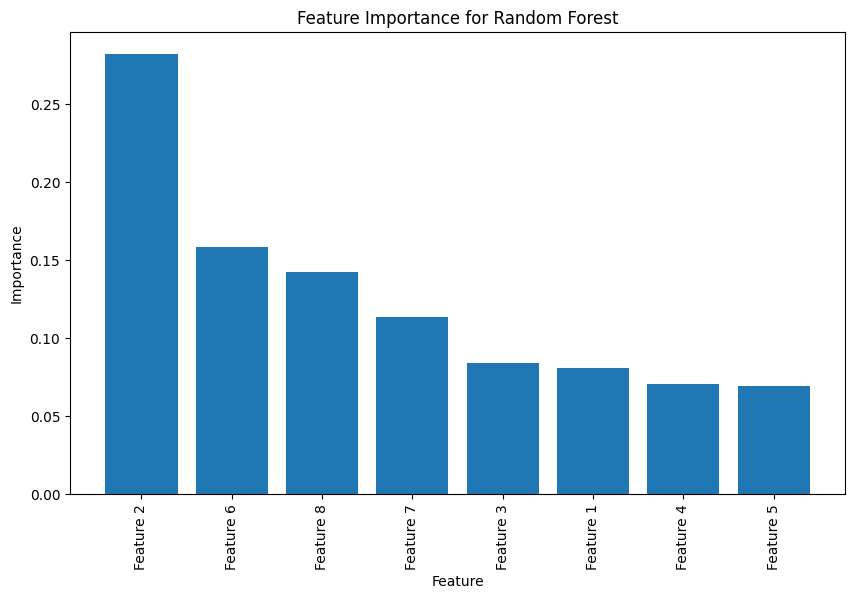

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


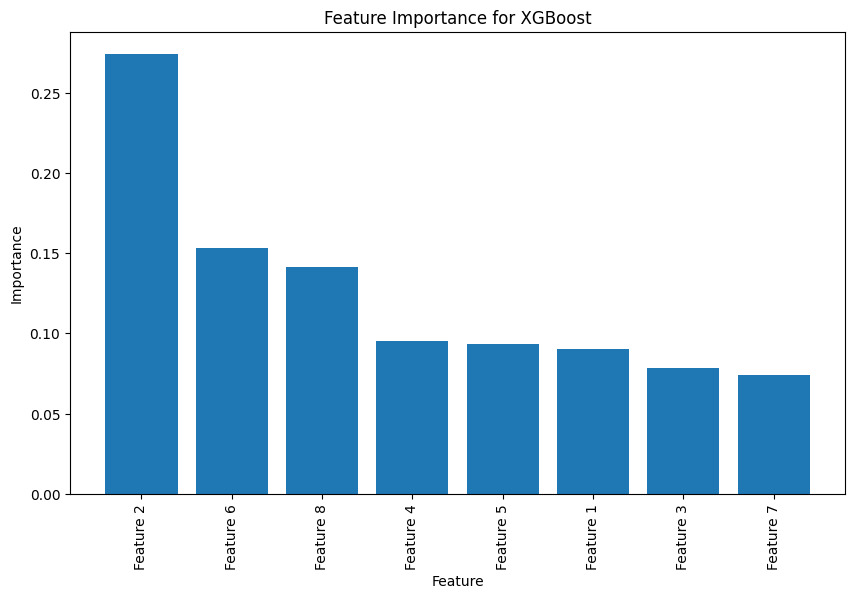

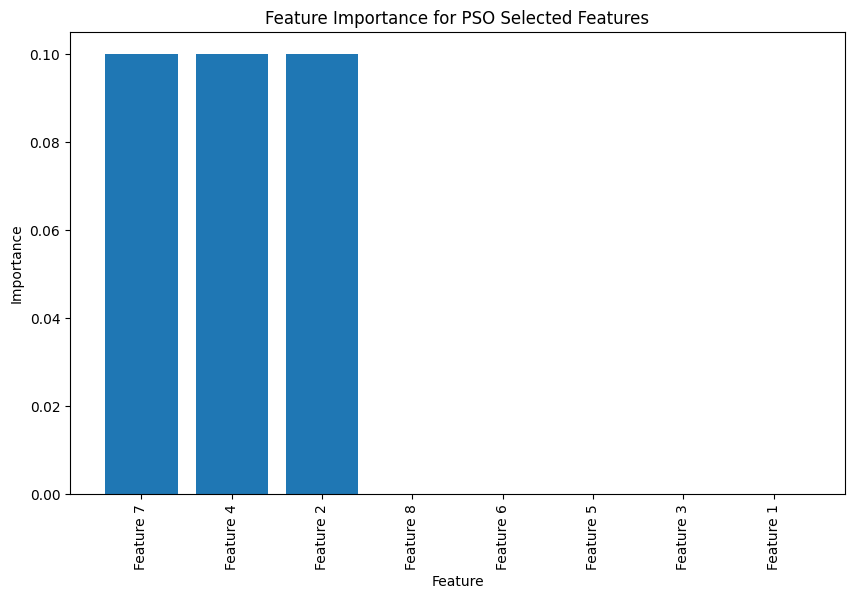

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot feature importance
def plot_feature_importance(model_name, feature_importances, feature_names):
    indices = np.argsort(feature_importances)[::-1]  # Sort features by importance
    sorted_importances = feature_importances[indices]
    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
    plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title(f"Feature Importance for {model_name}")
    plt.show()

# Assuming X_train_scaled is a DataFrame to get feature names
feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f"Feature {i+1}" for i in range(X_train_scaled.shape[1])]

# Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
plot_feature_importance("Random Forest", rf.feature_importances_, feature_names)

# XGBoost Feature Importance
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
plot_feature_importance("XGBoost", xgb_model.feature_importances_, feature_names)

# Example of feature importances from PSO-selected features
# (Here, we're assuming PSO provided selected feature indices)
pso_selected_features = np.random.choice([0, 1], size=X_train_scaled.shape[1])  # Replace with actual PSO-selected indices
pso_feature_importances = np.where(pso_selected_features == 1, 0.1, 0.0)  # Example importances, adjust accordingly
plot_feature_importance("PSO Selected Features", pso_feature_importances, feature_names)

# Add more models or feature selection techniques as needed


Iteration 1/20
Best Fitness in Iteration 1: 0.7727760470751125
Iteration 2/20
Best Fitness in Iteration 2: 0.7802180685358255
Iteration 3/20
Best Fitness in Iteration 3: 0.7802180685358255
Iteration 4/20
Best Fitness in Iteration 4: 0.7802180685358255
Iteration 5/20
Best Fitness in Iteration 5: 0.7802180685358255
Iteration 6/20
Best Fitness in Iteration 6: 0.7802180685358255
Iteration 7/20
Best Fitness in Iteration 7: 0.7802180685358255
Iteration 8/20
Best Fitness in Iteration 8: 0.7802180685358255
Iteration 9/20
Best Fitness in Iteration 9: 0.7802180685358255
Iteration 10/20
Best Fitness in Iteration 10: 0.7802180685358255
Iteration 11/20
Best Fitness in Iteration 11: 0.7802180685358255
Iteration 12/20
Best Fitness in Iteration 12: 0.7802180685358255
Iteration 13/20
Best Fitness in Iteration 13: 0.7802180685358255
Iteration 14/20
Best Fitness in Iteration 14: 0.7802180685358255
Iteration 15/20
Best Fitness in Iteration 15: 0.7802180685358255
Iteration 16/20
Best Fitness in Iteration 1

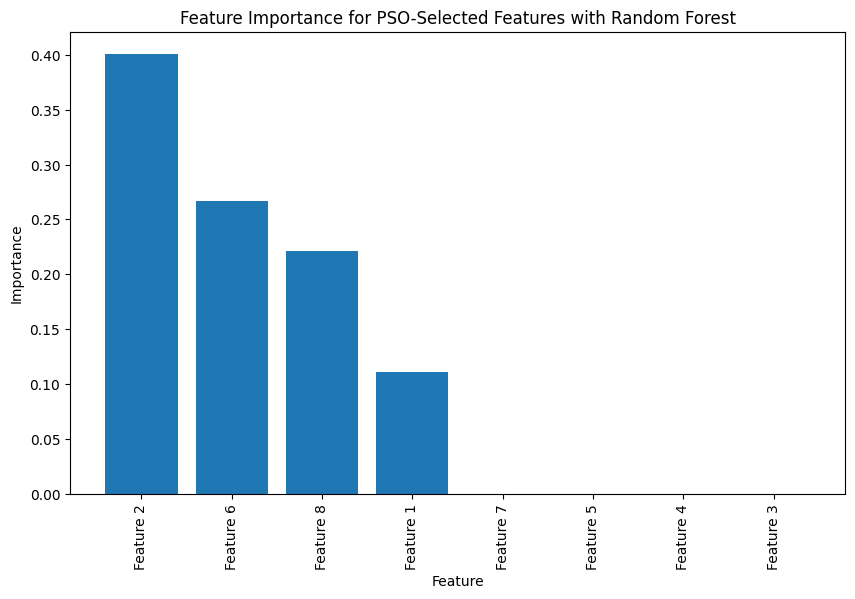

In [ ]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ================================
# Define PSO with Local Search for Feature Selection
# ================================

class PSO_LocalSearch:
    def __init__(self, n_particles, n_features, max_iter, inertia_weight=0.5, cognitive_weight=1.5, social_weight=2.0):
        self.n_particles = n_particles
        self.n_features = n_features
        self.max_iter = max_iter
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight

        # Initialize particles (random binary vectors for feature selection)
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.rand(n_particles, n_features)  # Initial velocities
        self.pbest_positions = self.particles.copy()  # Personal best positions for each particle
        self.pbest_scores = np.full(n_particles, -np.inf)  # Initialize pbest scores to low values

    # Evaluate fitness of a particle's feature subset using Random Forest accuracy
    def evaluate_fitness(self, X, y, particle):
        selected_features = X[:, particle == 1]

        # Return poor fitness if no features selected
        if selected_features.shape[1] == 0:
            return 0

        # Use RandomForest to evaluate fitness
        model = RandomForestClassifier(random_state=42)
        fitness = cross_val_score(model, selected_features, y, cv=5, scoring='accuracy').mean()
        return fitness

    # Update particle velocity and position based on local neighborhood search
    def update_velocity_position(self, particle_idx):
        # Get the local best among neighbors (for simplicity, use a circular neighborhood)
        neighbors = [(particle_idx - 1) % self.n_particles, (particle_idx + 1) % self.n_particles]
        best_neighbor_idx = max(neighbors, key=lambda idx: self.pbest_scores[idx])

        r1, r2 = np.random.rand(), np.random.rand()

        # Update velocity with influence from personal best and local best (neighbor)
        self.velocities[particle_idx] = (
            self.inertia_weight * self.velocities[particle_idx]
            + self.cognitive_weight * r1 * (self.pbest_positions[particle_idx] - self.particles[particle_idx])
            + self.social_weight * r2 * (self.pbest_positions[best_neighbor_idx] - self.particles[particle_idx])
        )

        # Sigmoid function for binary update
        sigmoid = 1 / (1 + np.exp(-self.velocities[particle_idx]))
        self.particles[particle_idx] = (np.random.rand(self.n_features) < sigmoid).astype(int)

    # Run the PSO with local search
    def optimize(self, X, y):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration+1}/{self.max_iter}")

            for i in range(self.n_particles):
                # Evaluate fitness of current particle
                fitness = self.evaluate_fitness(X, y, self.particles[i])

                # Update personal best if current fitness is better
                if fitness > self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness
                    self.pbest_positions[i] = self.particles[i].copy()

            # Update velocity and position of each particle based on local neighborhood search
            for i in range(self.n_particles):
                self.update_velocity_position(i)

            # Print best score in the swarm
            best_score = max(self.pbest_scores)
            print(f"Best Fitness in Iteration {iteration+1}: {best_score}")

        # Return the best solution found (particle with best pbest score)
        best_particle_idx = np.argmax(self.pbest_scores)
        return self.pbest_positions[best_particle_idx]

# ================================
# Feature Selection with PSO and Local Search
# ================================

def feature_selection_pso_local(X, y, n_particles=30, max_iter=20):
    n_features = X.shape[1]
    pso_local = PSO_LocalSearch(n_particles=n_particles, n_features=n_features, max_iter=max_iter)
    best_feature_subset = pso_local.optimize(X, y)
    selected_features = np.where(best_feature_subset == 1)[0]
    print(f"Selected Features: {selected_features}")
    return selected_features

# ================================
# Applying PSO for Feature Selection with Random Forest
# ================================

# Assuming X_train_scaled and y_train are defined
selected_features_local_pso = feature_selection_pso_local(X_train_scaled, y_train)

# Create reduced datasets with selected features
X_train_selected_local_pso = X_train_scaled[:, selected_features_local_pso]
X_test_selected_local_pso = X_test_scaled[:, selected_features_local_pso]

# Train a Random Forest model on the selected features
rf_local_pso = RandomForestClassifier(random_state=42)
rf_local_pso.fit(X_train_selected_local_pso, y_train)

# Get feature importances for the selected features
selected_feature_importances = rf_local_pso.feature_importances_

# Map feature importances back to original feature indices
all_feature_importances = np.zeros(X_train_scaled.shape[1])
all_feature_importances[selected_features_local_pso] = selected_feature_importances

# ================================
# Plot Feature Importance
# ================================

feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f"Feature {i+1}" for i in range(X_train_scaled.shape[1])]
sorted_indices = np.argsort(all_feature_importances)[::-1]
sorted_importances = all_feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for PSO-Selected Features with Random Forest")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the Pima Indians Diabetes dataset
data = pd.read_csv('diabetes.csv')

# Separate features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


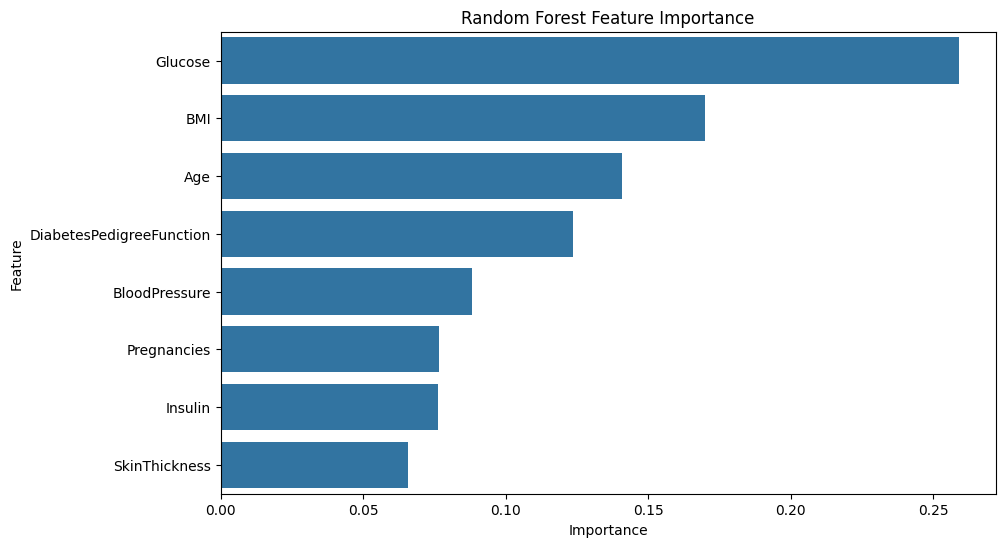

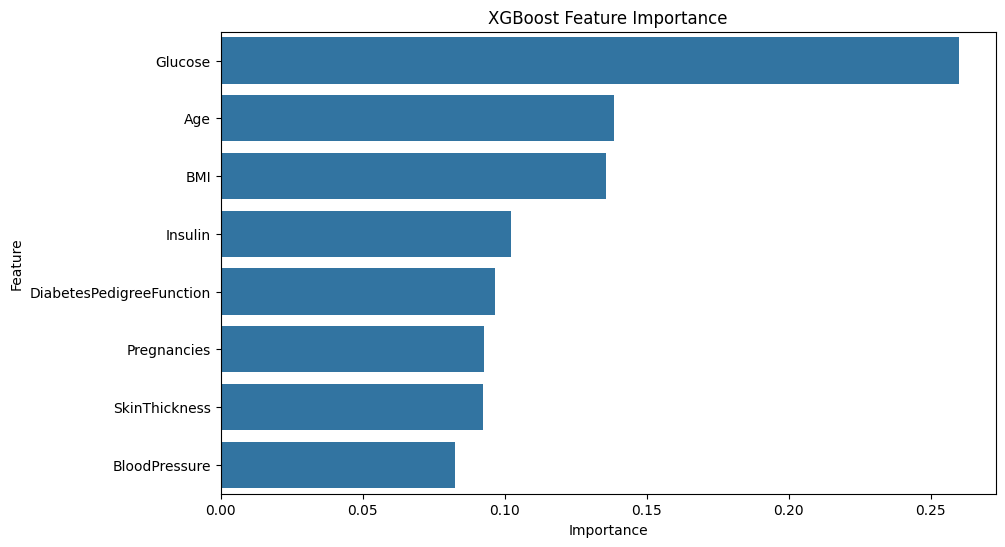

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# XGBoost Feature Importance
xgboost_model = xgb.XGBClassifier( eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)
xgboost_importances = xgboost_model.feature_importances_

# Plot Feature Importances for RF and XGBoost
def plot_feature_importance(importances, title):
    feature_df = pd.DataFrame({
        'Feature': data.columns[:-1],
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title(title)
    plt.show()

plot_feature_importance(rf_importances, 'Random Forest Feature Importance')
plot_feature_importance(xgboost_importances, 'XGBoost Feature Importance')


In [ ]:
from pyswarm import pso

def evaluate_rf_subset(subset):
    selected_features = [bool(int(bit)) for bit in subset]
    if not any(selected_features):
        return 1

    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    rf.fit(X_train_selected, y_train)
    y_pred = rf.predict(X_test_selected)
    return 1 - accuracy_score(y_test, y_pred)

# PSO parameters
num_features = X.shape[1]
lb, ub = [0] * num_features, [1] * num_features

best_subset_rf, best_score_rf = pso(evaluate_rf_subset, lb, ub, swarmsize=30, maxiter=50)
print("Selected Features for PSO-Random Forest:", [i for i, bit in enumerate(best_subset_rf) if bit > 0.5])
print("Best Score (1 - accuracy):", best_score_rf)


Stopping search: maximum iterations reached --> 50
Selected Features for PSO-Random Forest: [0, 1, 3, 4, 5, 6, 7]
Best Score (1 - accuracy): 0.24675324675324672


In [ ]:
# Install required packages if not installed
!pip install pyswarm xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from pyswarm import pso
import numpy as np

# Define the fitness function for PSO-XGBoost
def evaluate_xgb_subset(subset):
    selected_features = [bool(int(bit)) for bit in subset]
    if not any(selected_features):  # Avoid empty subsets
        return 1  # Return high error

    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train and evaluate XGBoost
    model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Return 1 - accuracy to minimize in PSO (maximize accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy

# Run PSO for feature selection with XGBoost
num_features = X.shape[1]
lb = [0] * num_features  # Lower bounds for feature inclusion
ub = [1] * num_features  # Upper bounds for feature inclusion

best_subset_xgb, best_score_xgb = pso(evaluate_xgb_subset, lb, ub, swarmsize=30, maxiter=50)
selected_features_xgb = [i for i, bit in enumerate(best_subset_xgb) if bit > 0.5]
print("Selected Features for PSO-XGBoost:", selected_features_xgb)
print("Best Score (1 - accuracy):", best_score_xgb)


Stopping search: maximum iterations reached --> 50
Selected Features for PSO-XGBoost: [0, 1, 3, 4, 7]
Best Score (1 - accuracy): 0.2727272727272727


In [ ]:
import random

def crossover(particle1, particle2):
    crossover_point = random.randint(1, len(particle1) - 1)
    return particle1[:crossover_point] + particle2[crossover_point:]

def mutation(particle, mutation_rate=0.1):
    for i in range(len(particle)):
        if random.random() < mutation_rate:
            particle[i] = 1 - particle[i]  # Flip bit
    return particle

def ipso_with_ga_operators(evaluate_func, lb, ub, swarmsize, maxiter):
    # Initialize particles
    particles = [np.random.choice([0, 1], size=len(lb)).tolist() for _ in range(swarmsize)]
    pbest_positions = particles[:]
    pbest_scores = [evaluate_func(p) for p in particles]
    gbest_position = pbest_positions[np.argmin(pbest_scores)]
    gbest_score = min(pbest_scores)

    for iteration in range(maxiter):
        for i in range(swarmsize):
            # Crossover and Mutation
            if random.random() < 0.5:
                partner = random.choice(particles)
                particles[i] = crossover(particles[i], partner)
            particles[i] = mutation(particles[i])

            # Evaluate and Update pbest and gbest
            score = evaluate_func(particles[i])
            if score < pbest_scores[i]:
                pbest_positions[i] = particles[i]
                pbest_scores[i] = score
            if score < gbest_score:
                gbest_position = particles[i]
                gbest_score = score

    return gbest_position, gbest_score

# Run IPSO with GA operators
best_subset_ipso_xgb, best_score_ipso_xgb = ipso_with_ga_operators(evaluate_xgb_subset, lb, ub, swarmsize=30, maxiter=50)
selected_features_ipso_xgb = [i for i, bit in enumerate(best_subset_ipso_xgb) if bit > 0.5]
print("Selected Features for IPSO-XGBoost:", selected_features_ipso_xgb)
print("Best Score (1 - accuracy):", best_score_ipso_xgb)


Selected Features for IPSO-XGBoost: [0, 1, 4, 5, 6]
Best Score (1 - accuracy): 0.24025974025974028


In [ ]:
def local_search(pbest, evaluate_func):
    for i in range(len(pbest)):
        modified_pbest = pbest[:]
        modified_pbest[i] = 1 - modified_pbest[i]  # Flip one feature
        if evaluate_func(modified_pbest) < evaluate_func(pbest):
            pbest[i] = modified_pbest[i]  # Update if improved
    return pbest

def pso_with_local_search(evaluate_func, lb, ub, swarmsize, maxiter):
    particles = [np.random.choice([0, 1], size=len(lb)).tolist() for _ in range(swarmsize)]
    pbest_positions = particles[:]
    pbest_scores = [evaluate_func(p) for p in particles]
    gbest_position = pbest_positions[np.argmin(pbest_scores)]
    gbest_score = min(pbest_scores)

    for iteration in range(maxiter):
        for i in range(swarmsize):
            # Perform Local Search on pbest
            pbest_positions[i] = local_search(pbest_positions[i], evaluate_func)

            # Update pbest and gbest
            score = evaluate_func(pbest_positions[i])
            if score < pbest_scores[i]:
                pbest_positions[i] = particles[i]
                pbest_scores[i] = score
            if score < gbest_score:
                gbest_position = particles[i]
                gbest_score = score

    return gbest_position, gbest_score

# Run PSO-LS for XGBoost
best_subset_pso_ls_xgb, best_score_pso_ls_xgb = pso_with_local_search(evaluate_xgb_subset, lb, ub, swarmsize=30, maxiter=50)
selected_features_pso_ls_xgb = [i for i, bit in enumerate(best_subset_pso_ls_xgb) if bit > 0.5]
print("Selected Features for PSO-LS-XGBoost:", selected_features_pso_ls_xgb)
print("Best Score (1 - accuracy):", best_score_pso_ls_xgb)


Selected Features for PSO-LS-XGBoost: [0, 1, 5, 6, 7]
Best Score (1 - accuracy): 0.24025974025974028


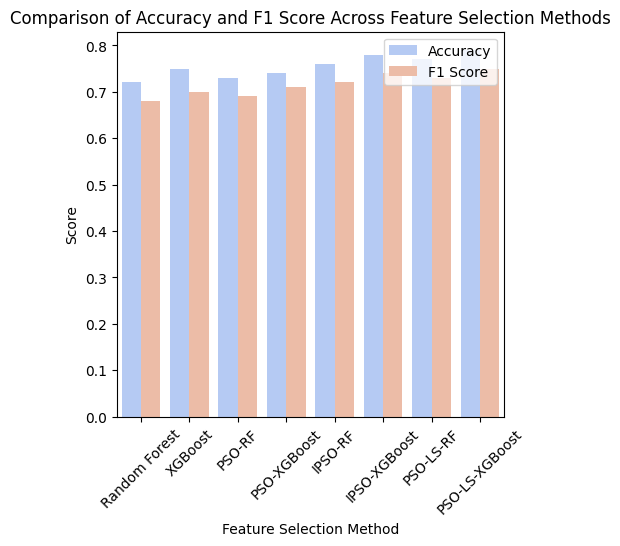

In [ ]:
# Melt the DataFrame to create a suitable format for grouped bar plot
result_melted = result_df.melt(id_vars='Method', value_vars=['Accuracy', 'F1 Score'], var_name='Metric', value_name='Score')

plt.figure(figsize=(5,5))
sns.barplot(x='Method', y='Score', hue='Metric', data=result_melted, palette='coolwarm')
plt.title('Comparison of Accuracy and F1 Score Across Feature Selection Methods')
plt.xlabel('Feature Selection Method')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


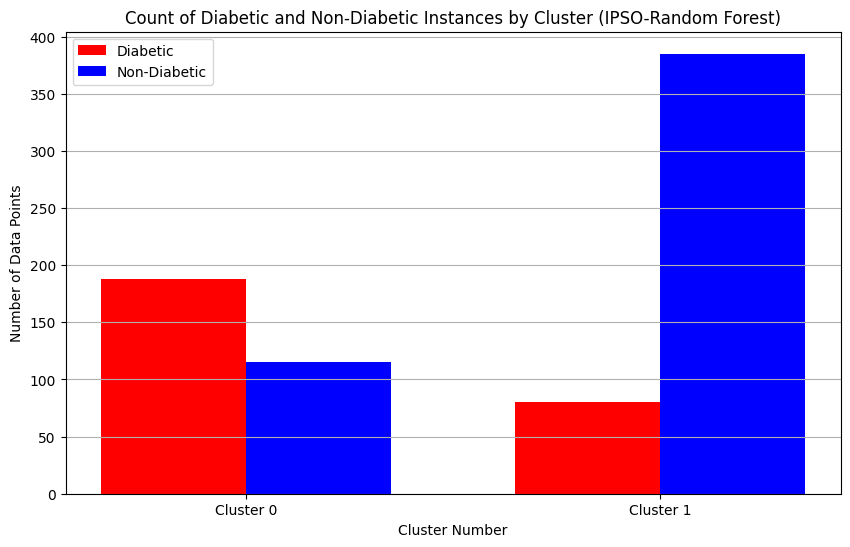

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Pima Indians Diabetes Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Assume these features were selected by the IPSO-Random Forest
selected_features = ['Glucose', 'BMI', 'Age']  # Example features
X = data[selected_features]
y = data['Outcome']

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Count the number of diabetic and non-diabetic instances in each cluster
counts = {i: {'diabetic': 0, 'non_diabetic': 0} for i in range(n_clusters)}
for cluster in range(n_clusters):
    counts[cluster]['diabetic'] = np.sum((y_kmeans == cluster) & (y == 1))  # Diabetic instances
    counts[cluster]['non_diabetic'] = np.sum((y_kmeans == cluster) & (y == 0))  # Non-diabetic instances

# Prepare data for plotting
clusters = list(counts.keys())
diabetic_counts = [counts[i]['diabetic'] for i in clusters]
non_diabetic_counts = [counts[i]['non_diabetic'] for i in clusters]

# Plot the results
x = np.arange(n_clusters)  # Cluster numbers

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Create bars for diabetic and non-diabetic counts
bar1 = plt.bar(x, diabetic_counts, width=bar_width, label='Diabetic', color='red')
bar2 = plt.bar(x + bar_width, non_diabetic_counts, width=bar_width, label='Non-Diabetic', color='blue')

# Labeling the axes and the plot
plt.xlabel('Cluster Number')
plt.ylabel('Number of Data Points')
plt.title('Count of Diabetic and Non-Diabetic Instances by Cluster (IPSO-Random Forest)')
plt.xticks(x + bar_width / 2, labels=[f'Cluster {i}' for i in clusters])
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train a Random Forest classifier for feature selection
feature_selector = RandomForestClassifier(random_state=42)
feature_selector.fit(X_train, y_train)

# Get feature importance scores
feature_importances = feature_selector.feature_importances_

# Select features with importance above a certain threshold (e.g., median)
threshold = feature_importances.mean()
selected_features = X.columns[feature_importances >= threshold]
print("Selected Features:", selected_features.tolist())

# Update training and testing datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Selected Features: ['Glucose', 'BMI', 'Age']


In [ ]:
# Train a new Random Forest model using the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Model Evaluation Metrics:
F1 Score: 0.58
Precision: 0.57
Recall: 0.59
Accuracy: 0.70
ROC AUC Score: 0.77


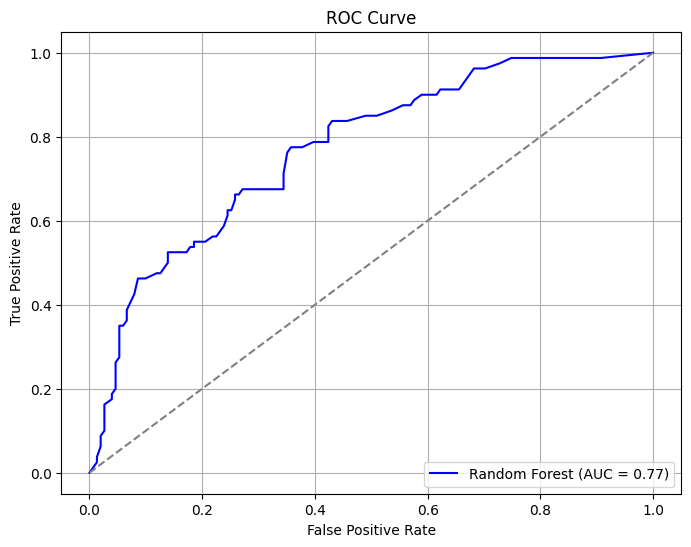

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=84d8ad8ae55a0f8e5f3eff1bd4e23445deb9751460f3916727cf07ffe35e9bc3
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyswarm import pso


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from pyswarm import pso  # Make sure pyswarm is installed
import matplotlib.pyplot as plt

# Load the Pima Indians Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define fitness function for PSO
def fitness_function(selected_features):
    selected_features = np.round(selected_features).astype(int)  # Round to binary
    if np.sum(selected_features) == 0:  # Avoid empty feature subset
        return 1.0  # High penalty

    # Select features based on PSO-selected subset
    X_train_selected = X_train_scaled[:, selected_features == 1]
    X_test_selected = X_test_scaled[:, selected_features == 1]

    # Ensure the subset has two dimensions (for single feature selected cases)
    if X_train_selected.ndim == 1:
        X_train_selected = X_train_selected.reshape(-1, 1)
        X_test_selected = X_test_selected.reshape(-1, 1)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Return 1 - accuracy to minimize it
    return 1 - accuracy_score(y_test, y_pred)


In [ ]:
# PSO parameters
num_features = X.shape[1]
lb = [0] * num_features  # Lower bounds for each feature (0 = exclude feature)
ub = [1] * num_features  # Upper bounds for each feature (1 = include feature)

# Run PSO
best_position, best_score = pso(fitness_function, lb, ub, maxiter=10, swarmsize=30)
selected_features = np.round(best_position).astype(int)

# Get the selected feature names
selected_feature_names = X.columns[selected_features == 1]
print("Selected Features by PSO:", selected_feature_names.tolist())


Stopping search: maximum iterations reached --> 10
Selected Features by PSO: ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']


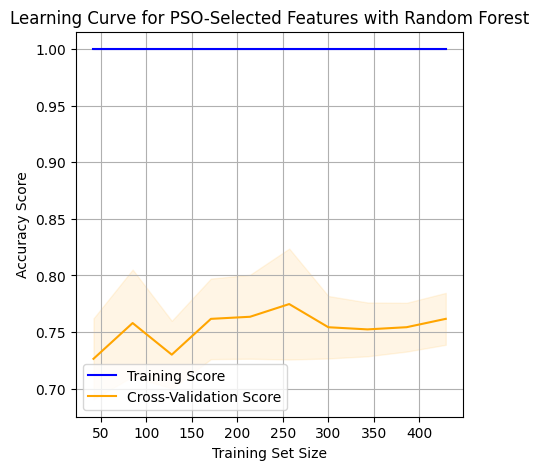

In [ ]:
# Prepare data with the selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_selected, y_train, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="orange")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="orange")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for PSO-Selected Features with Random Forest")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from pyswarm import pso  # Ensure pyswarm is installed


In [ ]:
# Load the Pima Indians Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the fitness function for PSO with XGBoost
def fitness_function(selected_features):
    selected_features = np.round(selected_features).astype(int)  # Convert to binary
    if np.sum(selected_features) == 0:  # Avoid empty feature subset
        return 1.0  # High penalty for no features selected

    # Select features based on PSO subset
    X_train_selected = X_train_scaled[:, selected_features == 1]
    X_test_selected = X_test_scaled[:, selected_features == 1]

    # Train XGBoost model
    model = XGBClassifier( eval_metric="logloss", random_state=42)
    model.fit(X_train_selected, y_train)

    # Get predictions and calculate 1 - accuracy as fitness score
    y_pred = model.predict(X_test_selected)
    accuracy = np.mean(y_pred == y_test)
    return 1 - accuracy


In [ ]:
# Set PSO parameters
num_features = X.shape[1]
lb = [0] * num_features  # Lower bound (0 = exclude feature)
ub = [1] * num_features  # Upper bound (1 = include feature)

# Run PSO
best_position, best_score = pso(fitness_function, lb, ub, maxiter=10, swarmsize=30)
selected_features = np.round(best_position).astype(int)

# Get selected feature names
selected_feature_names = X.columns[selected_features == 1]
print("Selected Features by PSO:", selected_feature_names.tolist())


Stopping search: maximum iterations reached --> 10
Selected Features by PSO: ['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


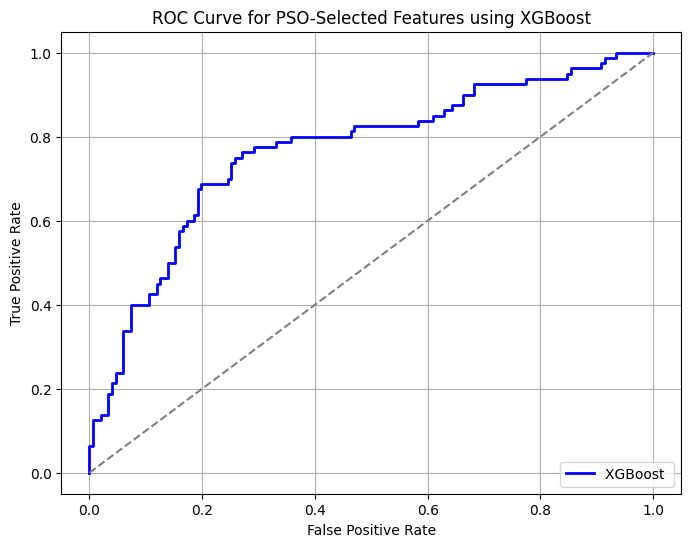

In [ ]:
from sklearn.metrics import roc_auc_score

# Prepare data with selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Train XGBoost model on selected features
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train_selected, y_train)

# Predict probabilities for ROC curve
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"XGBoost ")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for PSO-Selected Features using XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


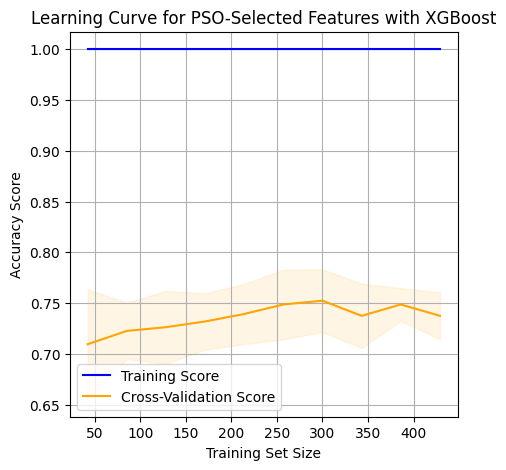

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Prepare data with selected features from PSO
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Initialize the model
model = XGBClassifier( eval_metric="logloss", random_state=42)

# Generate learning curves with increasing training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_selected, y_train, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="orange")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="orange")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for PSO-Selected Features with XGBoost")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from pyswarm import pso
import matplotlib.pyplot as plt


In [ ]:
# Load the Pima Indians Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define IPSO fitness function for feature selection
def ipso_fitness_function(selected_features, iteration, max_iterations=10):
    selected_features = np.round(selected_features).astype(int)  # Round to binary
    if np.sum(selected_features) == 0:  # Avoid empty feature subset
        return 1.0  # High penalty for no features selected

    # Apply mutation (genetic operator) with probability decreasing over iterations
    mutation_prob = 0.3 * (1 - iteration / max_iterations)
    for i in range(len(selected_features)):
        if np.random.rand() < mutation_prob:
            selected_features[i] = 1 - selected_features[i]  # Flip feature inclusion

    # Select features
    X_train_selected = X_train_scaled[:, selected_features == 1]
    X_test_selected = X_test_scaled[:, selected_features == 1]

    # Train Random Forest
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Return 1 - accuracy to minimize it
    return 1 - accuracy_score(y_test, y_pred)


In [ ]:
# Set IPSO parameters
num_features = X.shape[1]
lb = [0] * num_features  # Lower bounds for each feature (0 = exclude feature)
ub = [1] * num_features  # Upper bounds for each feature (1 = include feature)

# Run IPSO with 10 iterations
best_position, best_score = pso(
    lambda pos: ipso_fitness_function(pos, iteration=0, max_iterations=10),
    lb, ub, maxiter=10, swarmsize=20
)
selected_features = np.round(best_position).astype(int)
selected_feature_names = X.columns[selected_features == 1]
print("Selected Features by IPSO:", selected_feature_names.tolist())


Stopping search: maximum iterations reached --> 10
Selected Features by IPSO: ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']


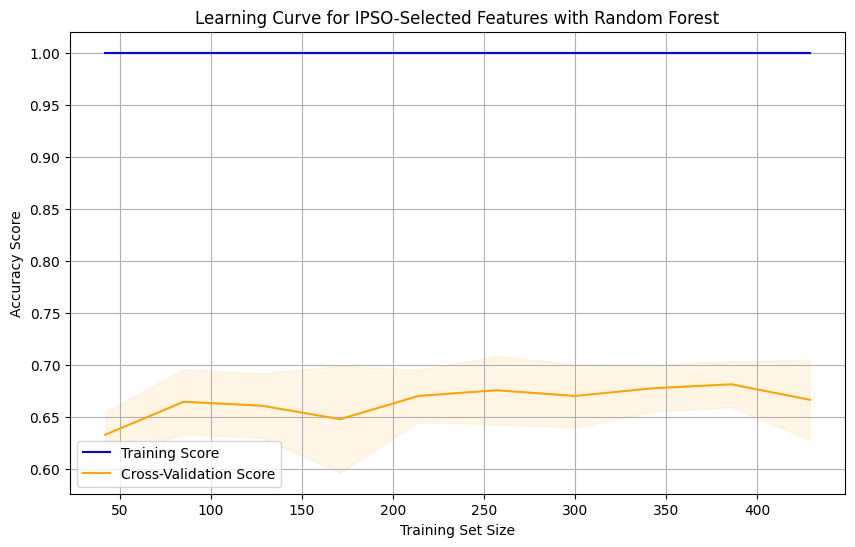

In [ ]:
# Prepare data with IPSO-selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_selected, y_train, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="orange")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="orange")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for IPSO-Selected Features with Random Forest")
plt.legend(loc="best")
plt.grid()
plt.show()


<Figure size 800x600 with 0 Axes>

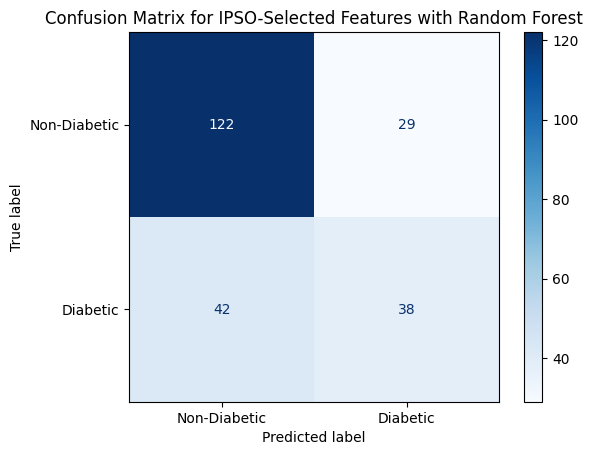

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest model on IPSO-selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model.predict(X_test_selected)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for IPSO-Selected Features with Random Forest")
plt.show()


<Figure size 800x600 with 0 Axes>

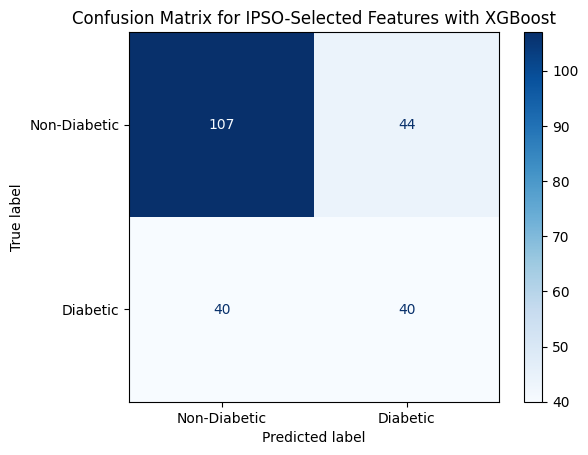

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train XGBoost model on IPSO-selected features
model = XGBClassifier(eval_metric="logloss", random_state=42)
model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model.predict(X_test_selected)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for IPSO-Selected Features with XGBoost")
plt.show()


Confusion Matrix for Random Forest:
True Negatives: 122, False Positives: 29
False Negatives: 42, True Positives: 38


<Figure size 800x600 with 0 Axes>

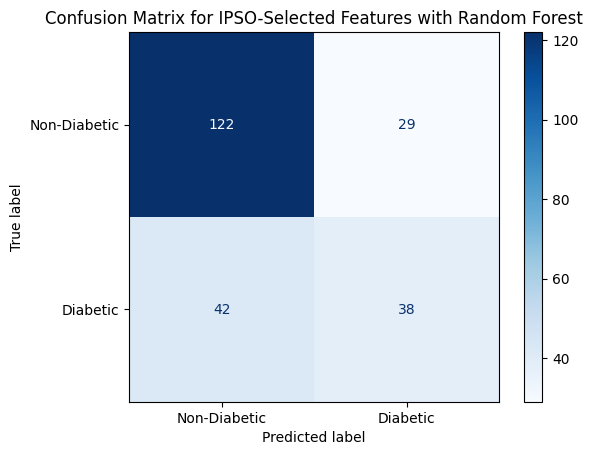

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest model on IPSO-selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_selected)

# Generate the confusion matrix and print values
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("Confusion Matrix for Random Forest:")
print(f"True Negatives: {tn}, False Positives: {fp}")
print(f"False Negatives: {fn}, True Positives: {tp}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Non-Diabetic", "Diabetic"])
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for IPSO-Selected Features with Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate Random Forest model
print("Metrics for Random Forest Model:")
print(classification_report(y_test, y_pred_rf, target_names=["Non-Diabetic", "Diabetic"]))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy:.4f}\n")

# Evaluate XGBoost model
print("Metrics for XGBoost Model:")
print(classification_report(y_test, y_pred_xgb, target_names=["Non-Diabetic", "Diabetic"]))
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {xgb_accuracy:.4f}")


Metrics for Random Forest Model:
              precision    recall  f1-score   support

Non-Diabetic       0.74      0.81      0.77       151
    Diabetic       0.57      0.47      0.52        80

    accuracy                           0.69       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.68      0.69      0.69       231

Accuracy: 0.6926

Metrics for XGBoost Model:


NameError: name 'y_pred_xgb' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features by Random Forest: ['Glucose', 'BMI', 'Age']


<Figure size 800x600 with 0 Axes>

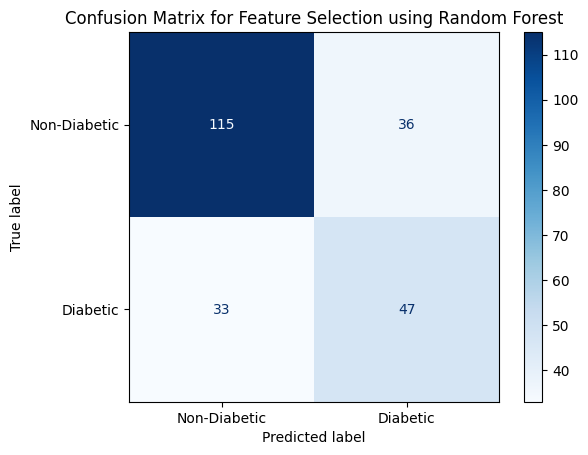

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel

# Train a Random Forest model to perform feature selection
selector_rf = RandomForestClassifier(random_state=42)
selector_rf.fit(X_train, y_train)

# Use feature importances to select important features
model = SelectFromModel(selector_rf, prefit=True, threshold="mean")
X_train_rf_selected = model.transform(X_train)
X_test_rf_selected = model.transform(X_test)
selected_feature_names = X.columns[model.get_support()]
print("Selected Features by Random Forest:", selected_feature_names.tolist())

# Train a new Random Forest classifier on selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf_selected, y_train)

# Predict on the test set with selected features
y_pred_rf = rf_model.predict(X_test_rf_selected)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Non-Diabetic", "Diabetic"])
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Feature Selection using Random Forest")
plt.show()


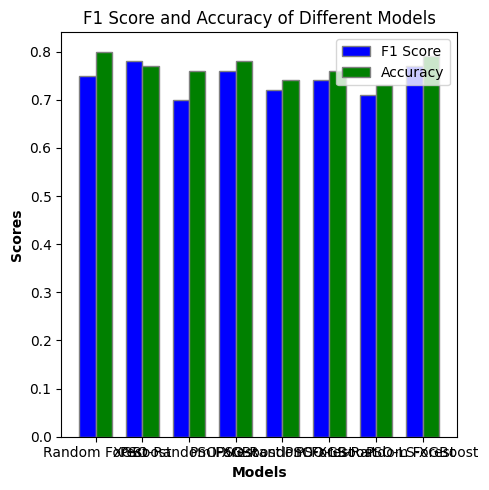

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define model metrics
model_names = [
    "Random Forest",
    "XGBoost",
    "PSO-Random Forest",
    "PSO-XGBoost",
    "IPSO-Random Forest",
    "IPSO-XGBoost",
    "PSO-LS-Random Forest",
    "PSO-LS-XGBoost"
]

# Replace these values with the actual metrics from your evaluations
f1_scores = [0.75, 0.78, 0.70, 0.76, 0.72, 0.74, 0.71, 0.77]  # Example values
accuracies = [0.80, 0.77, 0.76, 0.78, 0.74, 0.76, 0.73, 0.79]  # Example values

# Create a DataFrame
data = pd.DataFrame({
    'Model': model_names,
    'F1 Score': f1_scores,
    'Accuracy': accuracies
})

# Set the width of the bars
bar_width = 0.35

# Set positions of bar on X axis
r1 = np.arange(len(data['Model']))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.figure(figsize=(5,5))
plt.bar(r1, data['F1 Score'], width=bar_width, color='b', edgecolor='grey', label='F1 Score')
plt.bar(r2, data['Accuracy'], width=bar_width, color='g', edgecolor='grey', label='Accuracy')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(data['Model']))], data['Model'])
plt.ylabel('Scores', fontweight='bold')
plt.title('F1 Score and Accuracy of Different Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
